# Flatiron Phase II Project
### King's County 

## Introduction 

In this cumulative lab you'll perform a full linear regression analysis and report the findings of your final model, including both predictive model performance metrics and interpretation of fitted model parameters.

## Objectives

You will be able to:

* Perform a full linear regression analysis with iterative model development
* Evaluate your final model and interpret its predictive performance metrics
* Apply an inferential lens to interpret relationships between variables identified by the model

## Your Task: Develop a LEGO Pricing Algorithm

![sold](images/SOLD.jpg)


### Business Understanding

You just got hired by LEGO! Your first project is going to be to develop a pricing algorithm to help set a target price for new LEGO sets that are released to market. The goal is to save the company some time and to help ensure consistency in pricing between new products and past products.

The main purpose of this algorithm is *predictive*, meaning that **your model should be able to take in attributes of a LEGO set that does not yet have a set price, and to predict a good price**. The effectiveness of your predictive model will be measured by how well it predicts prices in our test set, where we know what the actual prices were but the model does not.

The secondary purpose of this algorithm is *inferential*, meaning that **your model should be able to tell us something about the relationship between the attributes of a LEGO set and its price**. You will apply your knowledge of statistics to include appropriate caveats about these relationships.

### Data Understanding

You have access to a dataset containing over 700 LEGO sets released in the past, including attributes of those sets as well as their prices. You can assume that the numeric attributes in this dataset have already been preprocessed appropriately for modeling (i.e. that there are no missing or invalid values), while the text attributes are simply there for your visual inspection and should not be used for modeling. Also, note that some of these attributes cannot be used in your analysis because they will be unavailable for future LEGO products or are otherwise irrelevant.

You do not need to worry about inflation or differences in currency; just predict the same kinds of prices as are present in the past data, which have already been converted to USD.

### Loading the Data

In the cells below, we load both the train and test datasets for you. Remember, both of these datasets contain prices, but we are using the test set as a stand-in for future LEGO products where the price has not yet been determined. The model will be trained on just the train set, then we will compare its predictions on the test set to the actual prices on the test set.

In [859]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [860]:
df = pd.read_csv("data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [861]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

BUILDING CONDITION
    	Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.



BUILDING GRADE
    	Represents the construction quality of improvements. Grades run from grade 1 to 13. 
        Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [862]:
##split data into test train here

Some more information about the features of this dataset:

A visualization of the distribution of the target variable:

In [863]:
# # Run this cell without changes

# fig, ax = plt.subplots(figsize=(10, 5))

# ax.hist(y_train, bins=100)

# ax.set_xlabel("Listing Price (USD)")
# ax.set_ylabel("Count of LEGO Sets")
# ax.set_title("Distribution of LEGO Set Prices");

### Requirements

#### 1. Exploratory Data Anaylsis (EDA) & Data Cleaning

You'll start modeling by choosing the feature that is most correlated with our target, and build and evaluate a linear regression model with just that feature.

#### 2. Build a Baseline Model

Now, add in the rest of the relevant numeric features of the training data, and compare that model's performance to the performance of the baseline model.

#### 3. Select the Best Combination of Features

Using statistical properties of the fitted model, the `sklearn.feature_selection` submodule, and some custom code, find the combination of relevant numeric features that produces the best scores.

#### 4. Build and Evaluate a Final Predictive Model

Using the best features selected in the previous step, create a final model, fit it on all rows of the training dataset, and evaluate it on all rows of the test dataset in terms of both r-squared and RMSE.

#### 5. Interpret the Final Model

Determine what, if any, understanding of the underlying relationship between variables can be determined with this model. This means you will need to interpret the model coefficients as well as checking whether the assumptions of linear regression have been met.

## 1. EDA and cleaning

### Interpreting a Correlation Heatmap

The code below produces a heatmap showing the correlations between all of the numeric values in our training data. The x and y axis labels indicate the pair of values that are being compared, and then the color and the number are both representing the correlation. Color is used here to make it easier to find the largest/smallest numbers — you could perform this analysis with just `train.corr()` if all you wanted was the correlation values.

The very left column of the plot is the most important, since it shows correlations between the target (listing price) and other attributes.

In [864]:
import numpy as np

import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_validate, ShuffleSplit

In [865]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [866]:
df = df.drop(['id'], axis=1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [867]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [868]:
df['month_sold'] = df['date'].dt.month
df['year_sold'] = df['date'].dt.year
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5,2014
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2,2015
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6,2014
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1,2015


In [869]:
df['age_when_sold'] = df['year_sold'] - df['yr_built']
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_when_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2,2015,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,2009,0.0,98103,47.6993,-122.346,1530,1509,5,2014,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,2014,0.0,98146,47.5107,-122.362,1830,7200,2,2015,1
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,2009,0.0,98144,47.5944,-122.299,1020,2007,6,2014,5
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,...,2004,0.0,98027,47.5345,-122.069,1410,1287,1,2015,11


In [870]:
df["age_when_sold"].value_counts()

 9      472
 8      443
 11     431
 0      430
 10     428
       ... 
 113     28
 115     26
 81      23
 80      21
-1       12
Name: age_when_sold, Length: 117, dtype: int64

In [871]:
df[df["age_when_sold"] == -1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_when_sold
1761,2014-06-25,597326.0,4,4.00,3570,8250,2.0,NO,NONE,Average,...,2015,NaN,98040,47.5784,-122.226,2230,10000,6,2014,-1
2685,2014-10-29,385195.0,1,1.00,710,6000,1.5,NO,NONE,Average,...,2015,NaN,98144,47.5756,-122.316,1440,4800,10,2014,-1
7519,2014-12-31,614285.0,5,2.75,2730,6401,2.0,NO,NONE,Average,...,2015,0.0,98072,47.7685,-122.160,2520,6126,12,2014,-1
8032,2014-06-24,455000.0,2,1.50,1200,1259,2.0,NO,NONE,Average,...,2015,NaN,98144,47.6001,-122.298,1320,1852,6,2014,-1
14475,2014-08-26,500000.0,2,2.25,1570,1269,2.0,NaN,NONE,Average,...,2015,NaN,98199,47.6514,-122.385,1570,6000,8,2014,-1
17084,2014-06-17,350000.0,3,2.00,1380,3600,3.0,NaN,NONE,Average,...,2015,0.0,98122,47.6074,-122.305,1480,3600,6,2014,-1
19789,2014-08-01,455000.0,3,1.75,1320,1014,3.0,NO,NONE,Average,...,2015,0.0,98122,47.6047,-122.305,1380,1495,8,2014,-1
20754,2014-08-28,357000.0,5,2.50,2990,9240,2.0,NO,NONE,Average,...,2015,0.0,98133,47.7384,-122.348,1970,18110,8,2014,-1
20836,2014-07-09,595000.0,4,3.25,3730,4560,2.0,NO,NONE,Average,...,2015,0.0,98103,47.6725,-122.330,1800,4560,7,2014,-1
20947,2014-07-31,230000.0,3,1.50,1040,1264,2.0,NO,NONE,Average,...,2015,0.0,98144,47.5951,-122.301,1350,3000,7,2014,-1


In [872]:
df['age_when_sold'] = df['age_when_sold'].apply(lambda x: 0 if x == -1 else x)

In [873]:
df["age_when_sold"].value_counts()

9      472
8      443
0      442
11     431
10     428
      ... 
112     33
113     28
115     26
81      23
80      21
Name: age_when_sold, Length: 116, dtype: int64

In [874]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [875]:
df[['sqft_living','sqft_lot','sqft_above','sqft_basement']].head(50)

,sqft_living,sqft_lot,sqft_above,sqft_basement
0,1180,5650,1180,0.0
1,2570,7242,2170,400.0
2,770,10000,770,0.0
3,1960,5000,1050,910.0
4,1680,8080,1680,0.0
5,5420,101930,3890,1530.0
6,1715,6819,1715,?
7,1060,9711,1060,0.0
8,1780,7470,1050,730.0
9,1890,6560,1890,0.0


In [876]:
df.loc[df['sqft_basement'] == '?'][['sqft_living','sqft_lot','sqft_above','sqft_basement']]

,sqft_living,sqft_lot,sqft_above,sqft_basement
6,1715,6819,1715,?
18,1200,9850,1200,?
42,3595,5639,3595,?
79,3450,39683,3450,?
112,1540,12600,1160,?
...,...,...,...,...
21442,2360,5000,1390,?
21447,2330,4907,2330,?
21473,980,1010,980,?
21519,2380,5737,2380,?


In [877]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [878]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
1920.0    0.000046
3480.0    0.000046
2730.0    0.000046
2720.0    0.000046
248.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [879]:
df['sqft_basement'] = df['sqft_living'] - df['sqft_above'] 

In [880]:
df['sqft_basement'].value_counts(normalize=True)

0      0.607029
600    0.010233
700    0.010094
500    0.009909
800    0.009538
         ...   
518    0.000046
374    0.000046
784    0.000046
906    0.000046
248    0.000046
Name: sqft_basement, Length: 306, dtype: float64

In [881]:
df[['sqft_living','sqft_lot','sqft_above','sqft_basement']].head(10)

,sqft_living,sqft_lot,sqft_above,sqft_basement
0,1180,5650,1180,0
1,2570,7242,2170,400
2,770,10000,770,0
3,1960,5000,1050,910
4,1680,8080,1680,0
5,5420,101930,3890,1530
6,1715,6819,1715,0
7,1060,9711,1060,0
8,1780,7470,1050,730
9,1890,6560,1890,0


In [882]:
# since, 60% of the data has 0 sqft basement, i think this is better represented as a catergorical yes or no feature

In [883]:
def basement(number):
    if number > 1:
        return 1
    else:
        return 0

df['has_basement']  = df['sqft_basement'].apply(reno)

In [884]:
df['has_basement'].value_counts()

0    13110
1     8487
Name: has_basement, dtype: int64

In [885]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [886]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [887]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [888]:
df['waterfront'].isna().sum()

2376

In [889]:
df['waterfront'].fillna('NO', inplace=True)
df['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [890]:
df['waterfront'] = df['waterfront'].map(lambda x: 1 if x == 'YES' else 0)
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [891]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [892]:
df['yr_renovated'].isna().sum()

3842

In [893]:
df['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [894]:
df['yr_renovated'].value_counts(normalize=True).head(20)

0.0       0.958096
2014.0    0.004112
2013.0    0.001746
2003.0    0.001746
2007.0    0.001690
2000.0    0.001633
2005.0    0.001633
2004.0    0.001239
1990.0    0.001239
2009.0    0.001183
2006.0    0.001126
1989.0    0.001126
2002.0    0.000957
1984.0    0.000901
1991.0    0.000901
1998.0    0.000901
2010.0    0.000845
1983.0    0.000845
2001.0    0.000845
2008.0    0.000845
Name: yr_renovated, dtype: float64

In [895]:
df['yr_renovated'].fillna(0.0, inplace=True)

In [896]:
df['yr_renovated'].describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [897]:
df['yr_renovated'].value_counts(normalize=True)

0.0       0.965551
2014.0    0.003380
2013.0    0.001435
2003.0    0.001435
2007.0    0.001389
            ...   
1951.0    0.000046
1953.0    0.000046
1946.0    0.000046
1976.0    0.000046
1948.0    0.000046
Name: yr_renovated, Length: 70, dtype: float64

In [898]:
def reno(year):
    if year > 1:
        return 1
    else:
        return 0

df['recent_reno']  = df['yr_renovated'].apply(reno)

In [899]:
df['recent_reno'].sum()

744

In [900]:
1-(744/21597)

0.9655507709404084

In [901]:
df['recent_reno'].value_counts(normalize=True)

0    0.965551
1    0.034449
Name: recent_reno, dtype: float64

In [902]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  float64       
 15  zipcode        2159

In [903]:
df = df.drop(['date', 'yr_built','yr_renovated' ], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_when_sold,has_basement,recent_reno
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,...,98178,47.5112,-122.257,1340,5650,10,2014,59,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,NONE,Average,7 Average,...,98125,47.7210,-122.319,1690,7639,12,2014,63,1,1
2,180000.0,2,1.00,770,10000,1.0,0,NONE,Average,6 Low Average,...,98028,47.7379,-122.233,2720,8062,2,2015,82,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,NONE,Very Good,7 Average,...,98136,47.5208,-122.393,1360,5000,12,2014,49,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,NONE,Average,8 Good,...,98074,47.6168,-122.045,1800,7503,2,2015,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,NONE,Average,8 Good,...,98103,47.6993,-122.346,1530,1509,5,2014,5,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0,NONE,Average,8 Good,...,98146,47.5107,-122.362,1830,7200,2,2015,1,0,0
21594,402101.0,2,0.75,1020,1350,2.0,0,NONE,Average,7 Average,...,98144,47.5944,-122.299,1020,2007,6,2014,5,0,0
21595,400000.0,3,2.50,1600,2388,2.0,0,NONE,Average,8 Good,...,98027,47.5345,-122.069,1410,1287,1,2015,11,0,0


In [904]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  month_sold     21597 non-null  int64  
 18  year_s

In [905]:
df["grade"]

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: object

In [906]:
df["grade"].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [907]:
df["condition"]

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object

In [908]:
df['condition'].isna().sum()

0

In [909]:
df["condition"].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [910]:
condition_key = {'Poor':1.0 , 'Fair':2.0 , 'Average':3.0 , 'Good':4.0 , 'Very Good':5.0}

In [911]:
# grade_key = {'3 Poor':0.0,
#              '4 Low':1.0,
#              '5 Fair':2.0,
#              '6 Low Average':3.0,
#              '7 Average': 4.0,
#              '8 Good':5.0,
#              '9 Better':6.0,
#              '10 Very Good':7.0,
#              '11 Excellent':8.0,
#              '12 Luxury': 9.0,
#              '13 Mansion':10.0}

In [912]:
grade_key = {'3 Poor':3.0,
             '4 Low':4.0,
             '5 Fair':5.0,
             '6 Low Average':6.0,
             '7 Average': 7.0,
             '8 Good':8.0,
             '9 Better':9.0,
             '10 Very Good':10.0,
             '11 Excellent':11.0,
             '12 Luxury': 12.0,
             '13 Mansion':13.0}

In [913]:
view_key = {'NONE':1.0 , 'AVERAGE':2.0 , 'GOOD':3.0 , 'FAIR':4.0 , 'EXCELLENT':5.0}

In [914]:
df['condition'] = df['condition'].replace(condition_key)

In [915]:
df['grade'] = df['grade'].replace(grade_key)

In [916]:
df['view'] = df['view'].replace(view_key)

In [917]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21597 non-null  float64
 9   grade          21597 non-null  float64
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  month_sold     21597 non-null  int64  
 18  year_s

In [918]:
df = df.drop('year_sold', axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,age_when_sold,has_basement,recent_reno
0,221900.0,3,1.00,1180,5650,1.0,0,1.0,3.0,7.0,...,0,98178,47.5112,-122.257,1340,5650,10,59,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,1.0,3.0,7.0,...,400,98125,47.7210,-122.319,1690,7639,12,63,1,1
2,180000.0,2,1.00,770,10000,1.0,0,1.0,3.0,6.0,...,0,98028,47.7379,-122.233,2720,8062,2,82,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,1.0,5.0,7.0,...,910,98136,47.5208,-122.393,1360,5000,12,49,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,1.0,3.0,8.0,...,0,98074,47.6168,-122.045,1800,7503,2,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,1.0,3.0,8.0,...,0,98103,47.6993,-122.346,1530,1509,5,5,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0,1.0,3.0,8.0,...,0,98146,47.5107,-122.362,1830,7200,2,1,0,0
21594,402101.0,2,0.75,1020,1350,2.0,0,1.0,3.0,7.0,...,0,98144,47.5944,-122.299,1020,2007,6,5,0,0
21595,400000.0,3,2.50,1600,2388,2.0,0,1.0,3.0,8.0,...,0,98027,47.5345,-122.069,1410,1287,1,11,0,0


In [919]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.006760,0.081944,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21534.0,1.196480,0.688242,1.0000,1.0000,1.0000,1.000,5.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


In [920]:
df['view'].value_counts(normalize=True)

1.0    0.901923
2.0    0.044441
3.0    0.023591
4.0    0.015325
5.0    0.014721
Name: view, dtype: float64

In [921]:
df['view'].fillna(1.0, inplace=True)

In [922]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  float64
 8   condition      21597 non-null  float64
 9   grade          21597 non-null  float64
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  month_sold     21597 non-null  int64  
 18  age_wh

In [923]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.006760,0.081944,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21597.0,1.195907,0.687319,1.0000,1.0000,1.0000,1.000,5.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


In [924]:
df = df.drop('lat', axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,long,sqft_living15,sqft_lot15,month_sold,age_when_sold,has_basement,recent_reno
0,221900.0,3,1.00,1180,5650,1.0,0,1.0,3.0,7.0,1180,0,98178,-122.257,1340,5650,10,59,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,1.0,3.0,7.0,2170,400,98125,-122.319,1690,7639,12,63,1,1
2,180000.0,2,1.00,770,10000,1.0,0,1.0,3.0,6.0,770,0,98028,-122.233,2720,8062,2,82,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,1.0,5.0,7.0,1050,910,98136,-122.393,1360,5000,12,49,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,1.0,3.0,8.0,1680,0,98074,-122.045,1800,7503,2,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,1.0,3.0,8.0,1530,0,98103,-122.346,1530,1509,5,5,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0,1.0,3.0,8.0,2310,0,98146,-122.362,1830,7200,2,1,0,0
21594,402101.0,2,0.75,1020,1350,2.0,0,1.0,3.0,7.0,1020,0,98144,-122.299,1020,2007,6,5,0,0
21595,400000.0,3,2.50,1600,2388,2.0,0,1.0,3.0,8.0,1600,0,98027,-122.069,1410,1287,1,11,0,0


In [925]:
df = df.drop('long', axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,month_sold,age_when_sold,has_basement,recent_reno
0,221900.0,3,1.00,1180,5650,1.0,0,1.0,3.0,7.0,1180,0,98178,1340,5650,10,59,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,1.0,3.0,7.0,2170,400,98125,1690,7639,12,63,1,1
2,180000.0,2,1.00,770,10000,1.0,0,1.0,3.0,6.0,770,0,98028,2720,8062,2,82,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,1.0,5.0,7.0,1050,910,98136,1360,5000,12,49,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,1.0,3.0,8.0,1680,0,98074,1800,7503,2,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,1.0,3.0,8.0,1530,0,98103,1530,1509,5,5,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0,1.0,3.0,8.0,2310,0,98146,1830,7200,2,1,0,0
21594,402101.0,2,0.75,1020,1350,2.0,0,1.0,3.0,7.0,1020,0,98144,1020,2007,6,5,0,0
21595,400000.0,3,2.50,1600,2388,2.0,0,1.0,3.0,8.0,1600,0,98027,1410,1287,1,11,0,0


In [926]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0,322000.00,450000.00,645000.0,7700000.0
bedrooms,21597.0,3.373200,0.926299,1.0,3.00,3.00,4.0,33.0
bathrooms,21597.0,2.115826,0.768984,0.5,1.75,2.25,2.5,8.0
sqft_living,21597.0,2080.321850,918.106125,370.0,1430.00,1910.00,2550.0,13540.0
sqft_lot,21597.0,15099.408760,41412.636876,520.0,5040.00,7618.00,10685.0,1651359.0
floors,21597.0,1.494096,0.539683,1.0,1.00,1.50,2.0,3.5
waterfront,21597.0,0.006760,0.081944,0.0,0.00,0.00,0.0,1.0
view,21597.0,1.195907,0.687319,1.0,1.00,1.00,1.0,5.0
condition,21597.0,3.409825,0.650546,1.0,3.00,3.00,4.0,5.0
grade,21597.0,7.657915,1.173200,3.0,7.00,7.00,8.0,13.0


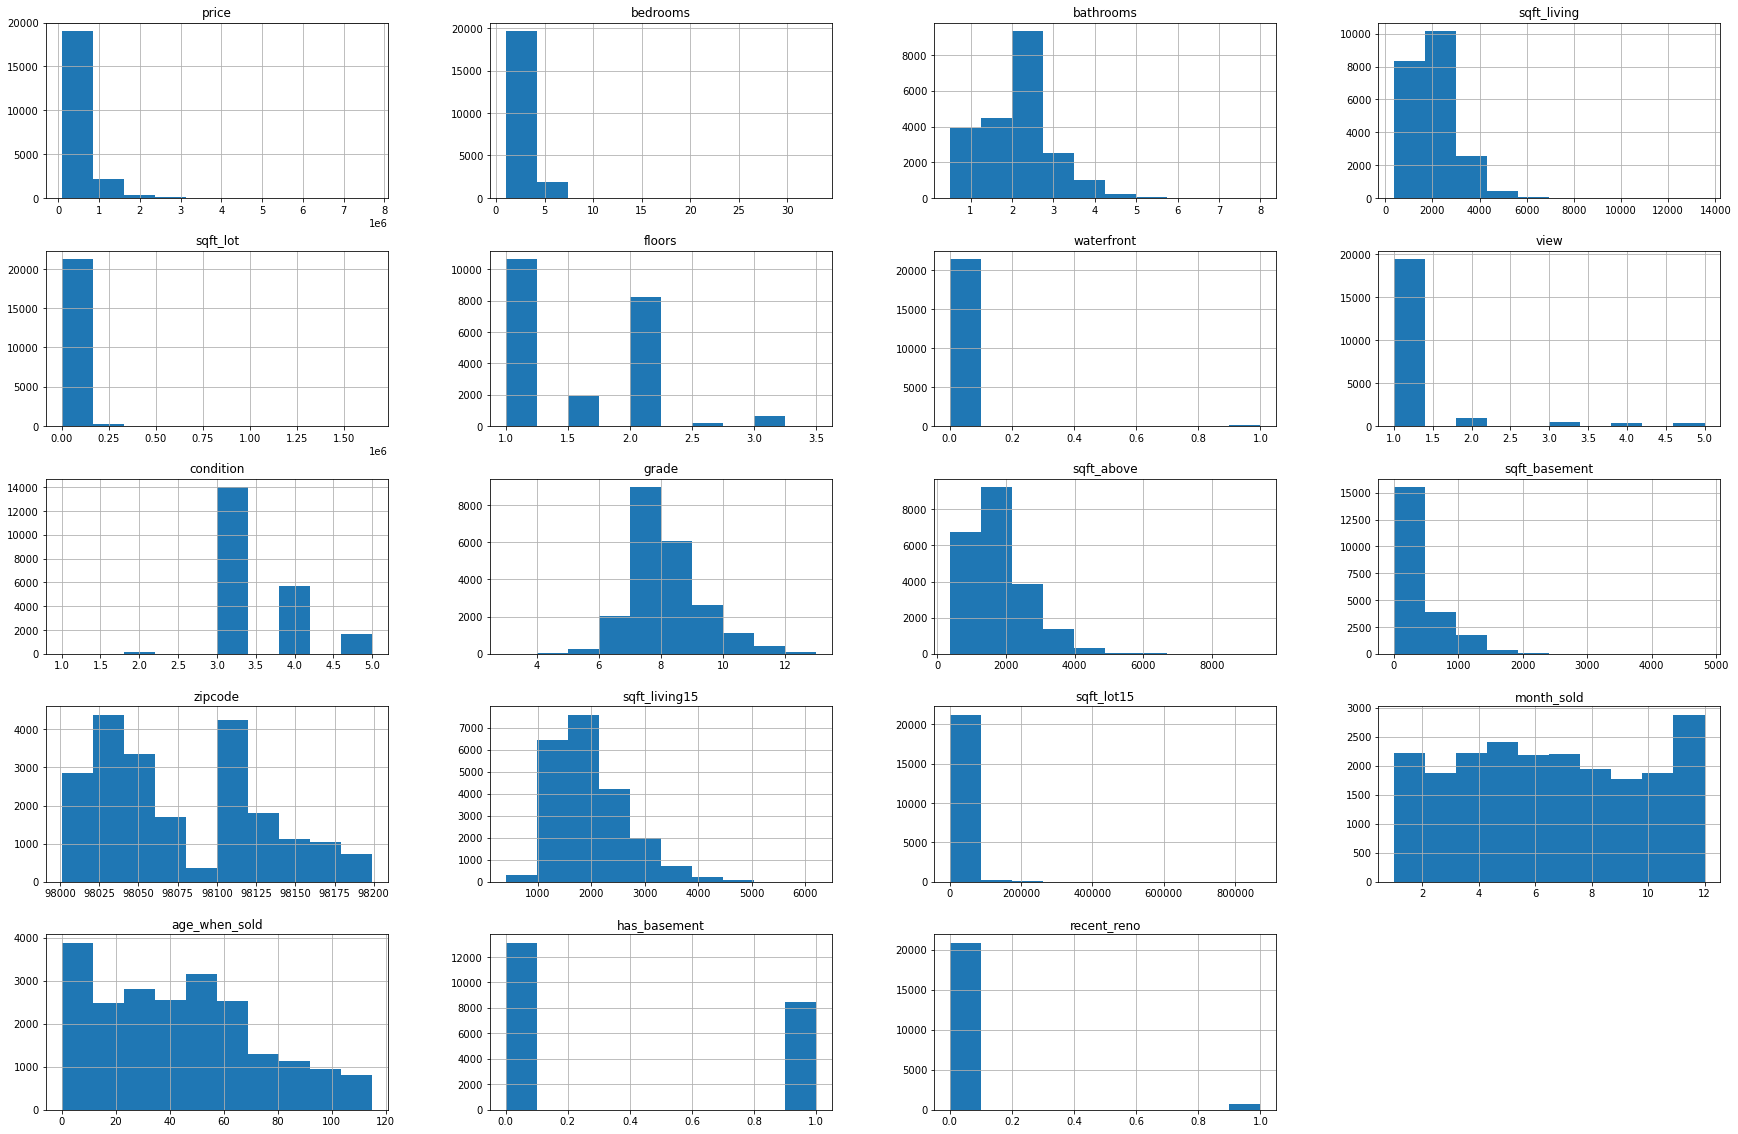

In [927]:
df.hist(figsize  = [30, 20]); 

In [928]:
# numerical = ['price', 'sqft_living','sqft_living15', 'sqft_lot','sqft_lot15','sqft_above', 'sqft_basement','lat','long','age_when_sold']

In [929]:
numerical = ['price', 'sqft_living','sqft_living15', 'sqft_lot','sqft_lot15','sqft_above', 'sqft_basement','age_when_sold']

In [930]:
kindaboth = ['bedrooms', 'bathrooms', 'floors']

In [931]:
categorical = ['waterfront', 'view', 'condition', 'grade', 'month_sold','recent_reno','zipcode']

In [932]:
df.shape

(21597, 19)

In [933]:
z = np.abs(stats.zscore(df[numerical+kindaboth]))
z.head(10)

,price,sqft_living,sqft_living15,sqft_lot,sqft_lot15,sqft_above,sqft_basement,age_when_sold,bedrooms,bathrooms,floors
0,0.866716,0.980652,0.943676,0.228182,0.260627,0.735251,0.659031,0.533642,0.402903,1.451073,0.915552
1,0.006252,0.533369,0.432887,0.189739,0.187700,0.460776,0.244602,0.669809,0.402903,0.174486,0.937431
2,0.980773,1.427234,1.070292,0.123139,0.172190,1.230575,0.659031,1.316600,1.482493,1.451073,0.915552
3,0.173409,0.131057,0.914488,0.243878,0.284459,0.892305,1.396734,0.193226,0.676687,1.149821,0.915552
4,0.082471,0.436040,0.272353,0.169503,0.192686,0.131197,0.659031,0.521649,0.402903,0.150626,0.915552
5,1.877461,3.637657,4.047461,2.096766,3.269500,2.538722,2.797366,1.032274,0.676687,3.100491,0.915552
6,0.769809,0.397917,0.366863,0.199953,0.217765,0.088913,0.659031,0.828024,0.402903,0.174486,0.937431
7,0.676303,1.111359,0.491263,0.130118,0.111729,0.880224,0.659031,0.295351,0.402903,0.800849,0.915552
8,0.846028,0.327118,0.301541,0.184233,0.170320,0.892305,0.990099,0.397476,0.402903,1.451073,0.915552
9,0.591509,0.207303,0.588691,0.206208,0.190230,0.122506,0.659031,1.066315,0.402903,0.499597,0.937431


In [934]:
z.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,0.637055,0.770836,0.000282,0.253965,0.509845,0.770897,19.489630
sqft_living,21597.0,0.760370,0.649505,0.000351,0.315524,0.642993,1.035113,12.482156
sqft_living15,21597.0,0.782465,0.622709,0.003824,0.340594,0.676255,1.055698,6.163587
sqft_lot,21597.0,0.333853,0.942647,0.000010,0.143665,0.199446,0.263269,39.512033
sqft_lot15,21597.0,0.370406,0.928891,0.000063,0.146305,0.218205,0.307024,31.474946
sqft_above,21597.0,0.773420,0.633909,0.000721,0.352046,0.666155,1.001034,9.207478
sqft_basement,21597.0,0.820850,0.571157,0.003897,0.659031,0.659031,0.659031,10.229748
age_when_sold,21597.0,0.836413,0.548112,0.011024,0.385482,0.759940,1.202482,2.439975
bedrooms,21597.0,0.791959,0.610588,0.402903,0.402903,0.676687,0.676687,31.984801
bathrooms,21597.0,0.799251,0.601011,0.150626,0.475738,0.499597,1.451073,7.652055


In [935]:
df2 = df[(z<3).all(axis=1)]

In [936]:
# df2 = df[(z<2).all(axis=1)]

In [937]:
df2.shape

(20239, 19)

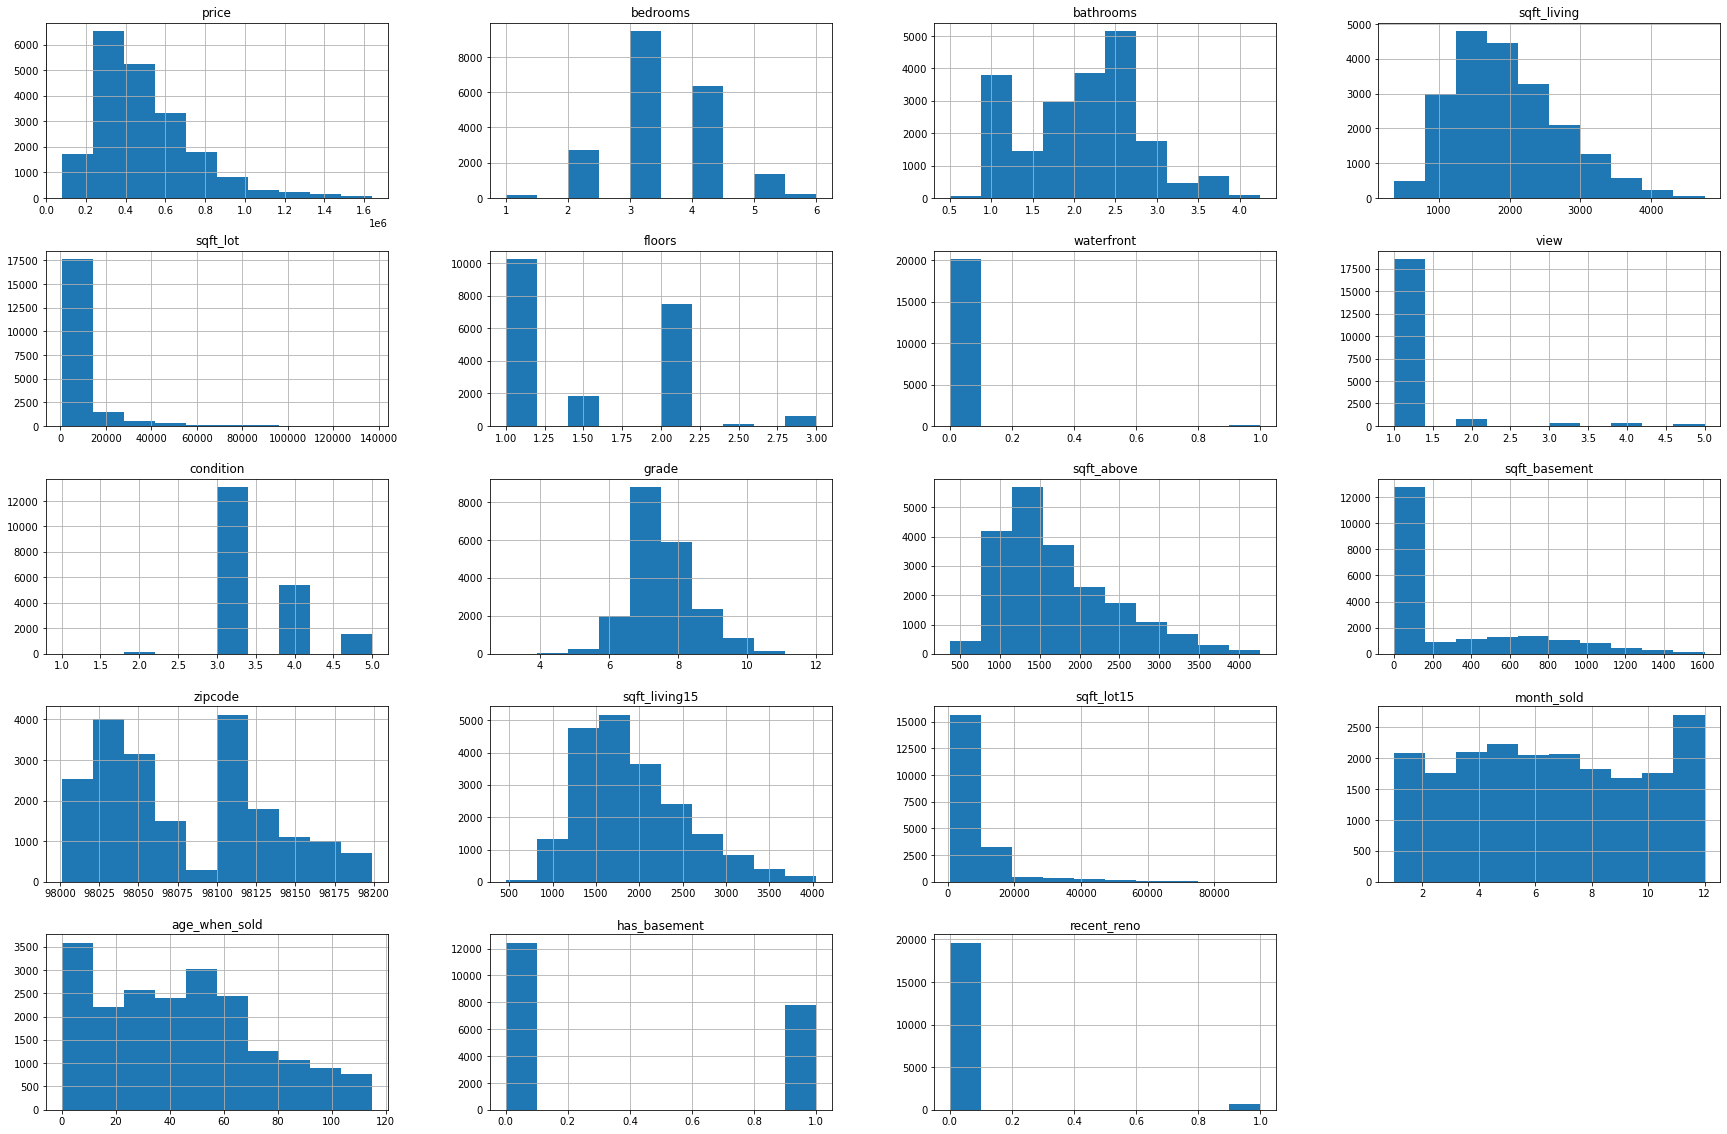

In [938]:
df2.hist(figsize  = [30, 20]); 

In [939]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,20239.0,493426.157468,245377.143139,78000.0,315000.0,439950.0,613000.0,1640000.00
bedrooms,20239.0,3.322496,0.855392,1.0,3.0,3.0,4.0,6.00
bathrooms,20239.0,2.048174,0.694745,0.5,1.5,2.0,2.5,4.25
sqft_living,20239.0,1966.610949,748.496659,370.0,1400.0,1860.0,2430.0,4750.00
sqft_lot,20239.0,10076.594348,11809.318968,520.0,5000.0,7412.0,10031.5,137214.00
floors,20239.0,1.480631,0.538121,1.0,1.0,1.0,2.0,3.00
waterfront,20239.0,0.003557,0.059540,0.0,0.0,0.0,0.0,1.00
view,20239.0,1.154059,0.598514,1.0,1.0,1.0,1.0,5.00
condition,20239.0,3.411483,0.650099,1.0,3.0,3.0,4.0,5.00
grade,20239.0,7.547507,1.046646,3.0,7.0,7.0,8.0,12.00


In [940]:
df = df2.copy()

In [941]:
df.shape

(20239, 19)

In [942]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20239 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20239 non-null  float64
 1   bedrooms       20239 non-null  int64  
 2   bathrooms      20239 non-null  float64
 3   sqft_living    20239 non-null  int64  
 4   sqft_lot       20239 non-null  int64  
 5   floors         20239 non-null  float64
 6   waterfront     20239 non-null  int64  
 7   view           20239 non-null  float64
 8   condition      20239 non-null  float64
 9   grade          20239 non-null  float64
 10  sqft_above     20239 non-null  int64  
 11  sqft_basement  20239 non-null  int64  
 12  zipcode        20239 non-null  int64  
 13  sqft_living15  20239 non-null  int64  
 14  sqft_lot15     20239 non-null  int64  
 15  month_sold     20239 non-null  int64  
 16  age_when_sold  20239 non-null  int64  
 17  has_basement   20239 non-null  int64  
 18  recent

In [943]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,20239.0,493426.157468,245377.143139,78000.0,315000.0,439950.0,613000.0,1640000.00
bedrooms,20239.0,3.322496,0.855392,1.0,3.0,3.0,4.0,6.00
bathrooms,20239.0,2.048174,0.694745,0.5,1.5,2.0,2.5,4.25
sqft_living,20239.0,1966.610949,748.496659,370.0,1400.0,1860.0,2430.0,4750.00
sqft_lot,20239.0,10076.594348,11809.318968,520.0,5000.0,7412.0,10031.5,137214.00
floors,20239.0,1.480631,0.538121,1.0,1.0,1.0,2.0,3.00
waterfront,20239.0,0.003557,0.059540,0.0,0.0,0.0,0.0,1.00
view,20239.0,1.154059,0.598514,1.0,1.0,1.0,1.0,5.00
condition,20239.0,3.411483,0.650099,1.0,3.0,3.0,4.0,5.00
grade,20239.0,7.547507,1.046646,3.0,7.0,7.0,8.0,12.00


In [944]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,month_sold,age_when_sold,has_basement,recent_reno
price,1.000000,0.296203,0.453863,0.626988,0.090334,0.270614,0.100610,0.284857,0.049932,0.638162,0.521863,0.253023,-0.011610,0.555659,0.083261,-0.012966,-0.028121,0.183736,0.102837
bedrooms,0.296203,1.000000,0.495016,0.604487,0.094441,0.166915,-0.035140,0.027165,0.025346,0.338178,0.483794,0.278399,-0.161493,0.394817,0.093720,-0.000772,-0.169370,0.147103,0.002857
bathrooms,0.453863,0.495016,1.000000,0.715539,0.055156,0.513756,-0.001456,0.091357,-0.132152,0.620235,0.632823,0.222388,-0.203727,0.530035,0.058322,0.012374,-0.539927,0.147273,0.030044
sqft_living,0.626988,0.604487,0.715539,1.000000,0.217295,0.357594,0.011895,0.165763,-0.064168,0.713190,0.852853,0.366997,-0.196516,0.739857,0.217047,0.015291,-0.340165,0.189646,0.032872
sqft_lot,0.090334,0.094441,0.055156,0.217295,1.000000,-0.099652,0.057935,0.052630,0.035782,0.128466,0.207362,0.040481,-0.181931,0.256914,0.814021,0.003407,-0.028400,-0.029837,0.014379
floors,0.270614,0.166915,0.513756,0.357594,-0.099652,1.000000,-0.001705,-0.008378,-0.269523,0.463800,0.540089,-0.287623,-0.059282,0.271056,-0.103226,0.013286,-0.500363,-0.270942,0.000067
waterfront,0.100610,-0.035140,-0.001456,0.011895,0.057935,-0.001705,1.000000,0.340974,0.011966,0.006803,-0.003227,0.028187,0.045302,0.027645,0.088461,0.003896,0.035561,0.020851,0.064298
view,0.284857,0.027165,0.091357,0.165763,0.052630,-0.008378,0.340974,1.000000,0.036700,0.143627,0.064523,0.197743,0.113569,0.199671,0.051258,-0.004365,0.076967,0.157971,0.078340
condition,0.049932,0.025346,-0.132152,-0.064168,0.035782,-0.269523,0.011966,0.036700,1.000000,-0.159228,-0.170616,0.182911,-0.006674,-0.102839,0.048090,0.021994,0.355635,0.131781,-0.056512
grade,0.638162,0.338178,0.620235,0.713190,0.128466,0.463800,0.006803,0.143627,-0.159228,1.000000,0.709468,0.081412,-0.174644,0.671890,0.142751,0.013874,-0.468089,0.024068,0.000274


<AxesSubplot:>

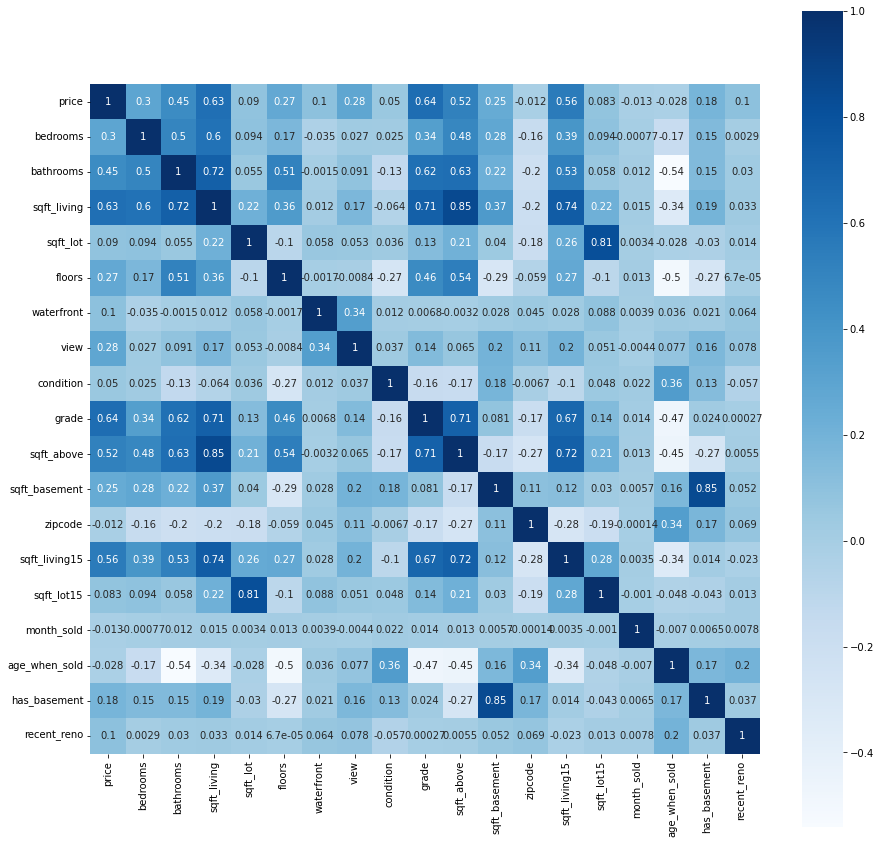

In [945]:
plt.figure(figsize=(15,15))
#sns.heatmap(df.corr(), annot=True, square=True, cmap= "Blues", mask=np.triu(np.ones_like(df.corr(), dtype=bool)),)
sns.heatmap(df.corr(), annot=True, square=True, cmap= "Blues")

Based on the plot above, which feature is most strongly correlated with the target (`listing_price`)? In other words, which feature has the strongest positive or negative correlation — the correlation with the greatest magnitude?

In [946]:

most_correlated = "grade"

(Make sure you run the cell above before proceeding.)

Let's create a scatter plot of that feature vs. listing price:

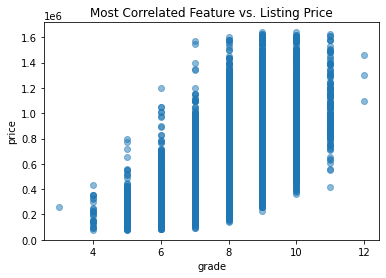

In [947]:
fig, ax = plt.subplots()

ax.scatter(df[most_correlated], df['price'], alpha=0.5)
ax.set_xlabel(most_correlated)
ax.set_ylabel("price")
ax.set_title("Most Correlated Feature vs. Listing Price");

Assuming you correctly identified `piece_count` (the number of pieces in the LEGO set) as the most correlated feature, you should have a scatter plot that shows a fairly clear linear relationship between that feature and the target. It looks like we are ready to proceed with making our baseline model without any additional transformation.

### Building a Baseline Model

Now, we'll build a linear regression model using just that feature, which will serve as our baseline model:

In [948]:
baseline_model = LinearRegression()

In [949]:

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)


In [950]:
baseline_scores = cross_validate(
    estimator=baseline_model,
    X=df[[most_correlated]],
    y=df['price'],
    return_train_score=True,
    cv=splitter
)

baseline_scores

{'fit_time': array([0.00266004, 0.00249076, 0.00201702]),
 'score_time': array([0.00113606, 0.00131726, 0.00109625]),
 'test_score': array([0.41364404, 0.40932008, 0.42026787]),
 'train_score': array([0.40506869, 0.40654915, 0.40264084])}

In [951]:
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4047528946449441
Validation score: 0.4144106635099371


Then we evaluate the model using `cross_validate` and `ShuffleSplit`, which essentially means that we perform 3 separate train-test splits within our `X_train` and `y_train`, then we find both the train and the test scores for each.

Interpret these scores below. What are we measuring? What can we learn from this?

**Hint:** when you use `cross_validate`, it uses the `.score` method of the estimator by default. See [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) for that method of `LinearRegression`.

In [952]:
# Replace None with appropriate text
"""
These scores represent the R^2 values. Both the Train score and Validation Model have essentially the same score, which shows our
linear regression model is a good baseline model.
"""

'\nThese scores represent the R^2 values. Both the Train score and Validation Model have essentially the same score, which shows our\nlinear regression model is a good baseline model.\n'

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>Because we are using the <code>.score</code> method of <code>LinearRegression</code>, these are r-squared scores. That means that each of them represents the amount of variance of the target (listing price) that is explained by the model's features (currently just the number of pieces) and parameters (intercept value and coefficient values for the features)</p>
    <p>In general this seems like a fairly strong model already. It is getting nearly identical performance on training subsets compared to the validation subsets, explaining around 80% of the variance both times</p>
</details>

## 2. Build a Model with All Numeric Features

Now that we have established a baseline, it's time to move on to more complex models.

### Numeric Feature Selection

One thing that you will almost always need to do in a modeling process is remove non-numeric data prior to modeling. While you could apply more-advanced techniques such as one-hot encoding or NLP in order to convert non-numeric columns into numbers, this time just create a dataframe `X_train_numeric` that is a copy of `X_train` that only contains numeric columns.

You can look at the `df.info()` printout above to do this manually, or there is a handy `.select_dtypes` method ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)).

In [953]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20239 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20239 non-null  float64
 1   bedrooms       20239 non-null  int64  
 2   bathrooms      20239 non-null  float64
 3   sqft_living    20239 non-null  int64  
 4   sqft_lot       20239 non-null  int64  
 5   floors         20239 non-null  float64
 6   waterfront     20239 non-null  int64  
 7   view           20239 non-null  float64
 8   condition      20239 non-null  float64
 9   grade          20239 non-null  float64
 10  sqft_above     20239 non-null  int64  
 11  sqft_basement  20239 non-null  int64  
 12  zipcode        20239 non-null  int64  
 13  sqft_living15  20239 non-null  int64  
 14  sqft_lot15     20239 non-null  int64  
 15  month_sold     20239 non-null  int64  
 16  age_when_sold  20239 non-null  int64  
 17  has_basement   20239 non-null  int64  
 18  recent

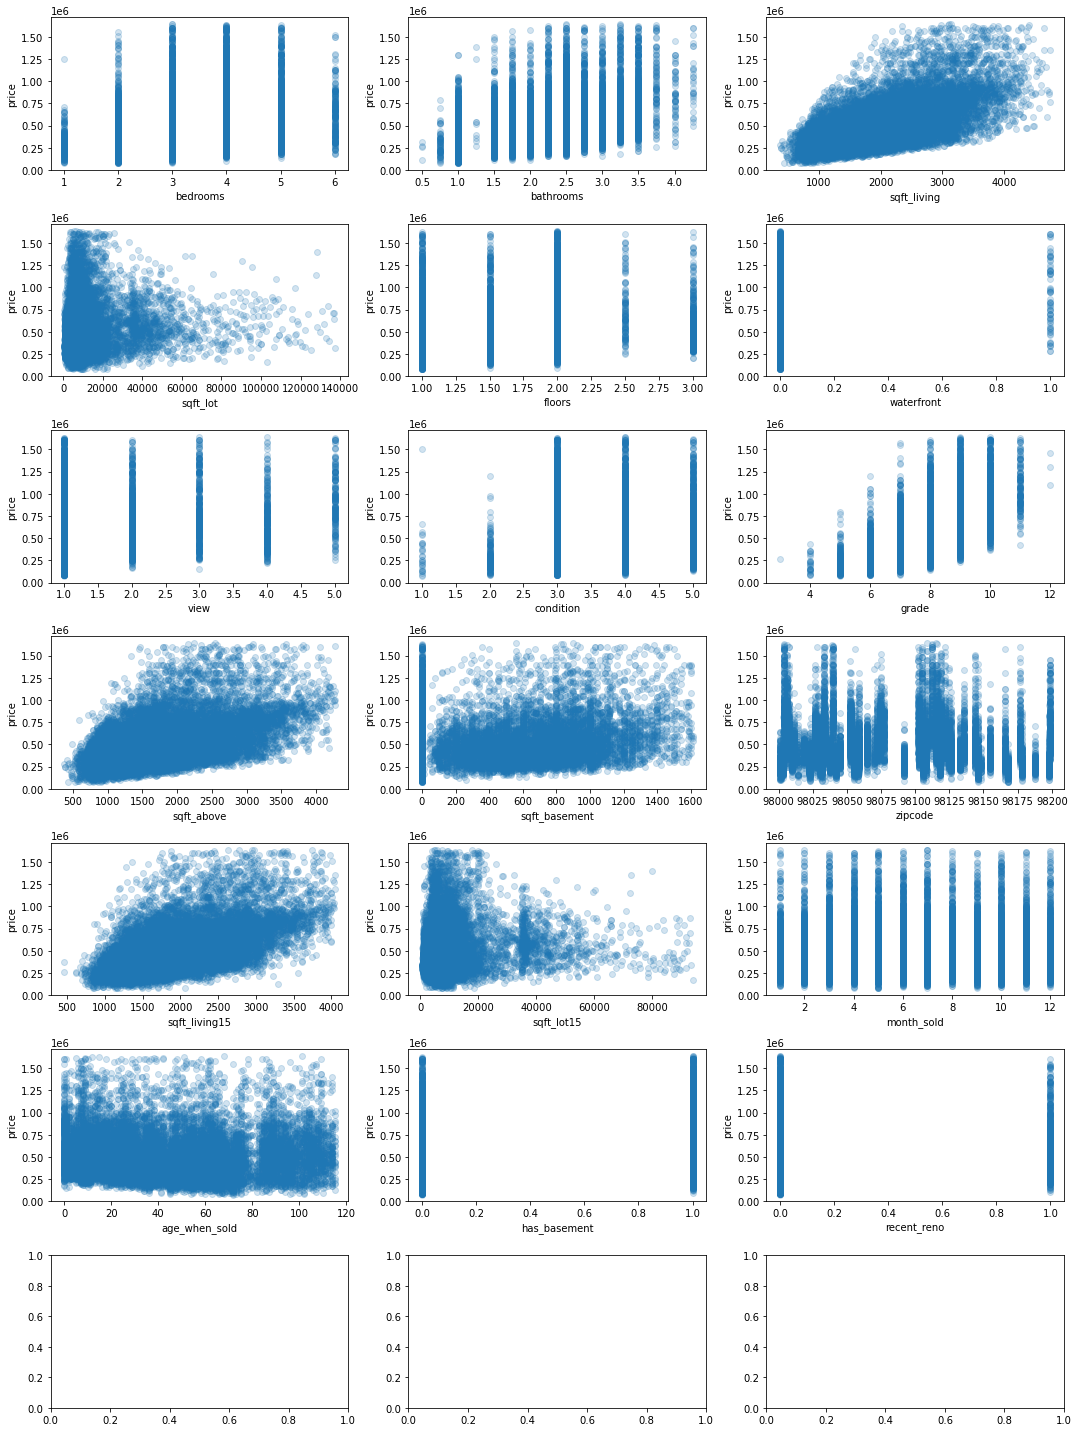

In [954]:
scatterplot_data = df.drop("price",axis=1)

fig, axes = plt.subplots(ncols=3, nrows=7, figsize=(15, 20))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(df[col], df["price"], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

In [955]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=df.drop("price",axis=1),
    y=df['price'],
    return_train_score=True,
    cv=splitter
)

print("Current Model - Linear Regression with all Features")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model - Linear Regression with only Most Correlated Feature")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model - Linear Regression with all Features
Train score:      0.6061460881617369
Validation score: 0.6068163123426036

Baseline Model - Linear Regression with only Most Correlated Feature
Train score:      0.4047528946449441
Validation score: 0.4144106635099371


In [956]:
sm.OLS(df['price'], sm.add_constant(df.drop("price",axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     1833.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:55:21   Log-Likelihood:            -2.7046e+05
No. Observations:               20239   AIC:                         5.410e+05
Df Residuals:                   20221   BIC:                         5.411e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.315e+06   2.28e+06     -3.213      0.001   -1.18e+07   -2.85e+06
bedrooms      -2.003e+04   1654.125    -12.108      0.000   -2.33e+04   -1.68e+04
bathrooms      2.909e+04   2744.509     10.599      0.000    2.37e+04    3.45e+04
sqft_living      53.9324      2.384     22.624      0.000      49.260      58.605
sqft_lot          0.0690      0.159      0.434      0.664      -0.243       0.381
floors         4.735e+04   2931.589     16.151      0.000    4.16e+04    5.31e+04
waterfront     1.925e+05   1.95e+04      9.871      0.000    1.54e+05    2.31e+05
view           3.657e+04   2039.332     17.930      0.000    3.26e+04    4.06e+04
condition      2.328e+04   1857.421     12.536      0.000    1.96e+04    2.69e+04
grade          1.069e+05   1720.377     62.120      0.000    1.03e+05     1.1e+05
sqft_above       30.4131      2.720     11.182      0.000      25.082      35.744
sqft_basement    23.5246      3.829      6.143      0.000      16.019      31.030
zipcode          65.5012     23.211      2.822      0.005      20.005     110.998
sqft_living15    57.4680      2.999     19.163      0.000      51.590      63.346
sqft_lot15       -1.5058      0.206     -7.305      0.000      -1.910      -1.102
month_sold    -2003.4312    347.796     -5.760      0.000   -2685.139   -1321.723
age_when_sold  2951.1655     55.003     53.655      0.000    2843.356    3058.975
has_basement   3.489e+04   4439.964      7.858      0.000    2.62e+04    4.36e+04
recent_reno    2.328e+04   6462.316      3.602      0.000    1.06e+04    3.59e+04
==============================================================================
Omnibus:                     3445.659   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10517.202
Skew:                           0.886   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                     4.16e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Investigating Multicollinearity

This potentially indicates that our model is performing poorly because these features violate the independence assumption (i.e. there is strong multicollinearity). In other words, maybe the minimum age, maximum age, and difficulty level are not really providing different information than the number of pieces in the LEGO set, and instead are just adding noise. Then the model is using that noise to get a slightly better score on the training data, but but a worse score on the validation data.

While `LinearRegression` from scikit-learn has a lot of nice functionality for working with a predictive framing (e.g. compatibility with the `cross_validate` function), it doesn't have anything built in to detect strong multicollinearity. Fortunately the same linear regression model is also available from StatsModels ([documentation here](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)), where it is called `OLS` (for "ordinary least squares"). Models in StatsModels, including `OLS`, are not really designed for predictive model validation, but they do give us a lot more statistical information.

In the cell below, we use StatsModels to fit and evaluate a linear regression model on the same features used in the second model. Note that we will only see one r-squared value (not train and validation r-squared values) because it is using the full `X_train` dataset instead of using cross-validation.

A condition number of 10-30 indicates multicollinearity, and a condition number above 30 indicates strong multicollinearity. This print-out shows a condition number of `2.85e+03`, i.e. 2770, which is well above 30.

In a predictive context (we are currently trying to build a model to assign prices to future LEGO sets, not a model primarily intended for understanding the relationship between prices and attributes of past LEGO sets), we do not *always* need to be worried when we identify strong multicollinearity. Sometimes there are features that are highly collinear but they also are individually communicating useful information to the model. In this case, however, it seems like strong multicollinearity might be what is causing our second model to have worse performance than the first model.

In [957]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,month_sold,age_when_sold,has_basement,recent_reno
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [958]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

dfcorr=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
dfcorr['pairs'] = list(zip(dfcorr.level_0, dfcorr.level_1))

# set index to pairs
dfcorr.set_index(['pairs'], inplace = True)

#d rop level columns
dfcorr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
dfcorr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
dfcorr.drop_duplicates(inplace=True)

In [959]:
dfcorr[(dfcorr.cc>.75) & (dfcorr.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.852853
"(has_basement, sqft_basement)",0.847576
"(sqft_lot15, sqft_lot)",0.814021


In [960]:
abs(df.corr()['price']).sort_values(ascending=False)

price            1.000000
grade            0.638162
sqft_living      0.626988
sqft_living15    0.555659
sqft_above       0.521863
bathrooms        0.453863
bedrooms         0.296203
view             0.284857
floors           0.270614
sqft_basement    0.253023
has_basement     0.183736
recent_reno      0.102837
waterfront       0.100610
sqft_lot         0.090334
sqft_lot15       0.083261
condition        0.049932
age_when_sold    0.028121
month_sold       0.012966
zipcode          0.011610
Name: price, dtype: float64

In [961]:
# between sqft living and sq ft above, we want to get rid of sq ft above as it is less correlated to price
# also sq ft above can be recalculated

# between lot15 and lot, get rid of lot15

#smaller abs value correlation to price


In [962]:
# df = df.drop(['sqft_above','sqft_lot15'], axis=1)
# df

In [963]:
df = df.drop(['sqft_above','sqft_lot15','sqft_basement'], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,sqft_living15,month_sold,age_when_sold,has_basement,recent_reno
0,221900.0,3,1.00,1180,5650,1.0,0,1.0,3.0,7.0,98178,1340,10,59,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,1.0,3.0,7.0,98125,1690,12,63,1,1
2,180000.0,2,1.00,770,10000,1.0,0,1.0,3.0,6.0,98028,2720,2,82,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,1.0,5.0,7.0,98136,1360,12,49,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,1.0,3.0,8.0,98074,1800,2,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,1.0,3.0,8.0,98103,1530,5,5,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0,1.0,3.0,8.0,98146,1830,2,1,0,0
21594,402101.0,2,0.75,1020,1350,2.0,0,1.0,3.0,7.0,98144,1020,6,5,0,0
21595,400000.0,3,2.50,1600,2388,2.0,0,1.0,3.0,8.0,98027,1410,1,11,0,0


In [964]:
# df = df.drop(['sqft_living'], axis=1)
# df

In [965]:
y = df['price']

In [966]:
sm.OLS(y, sm.add_constant(df.drop("price",axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     2068.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:55:22   Log-Likelihood:            -2.7049e+05
No. Observations:               20239   AIC:                         5.410e+05
Df Residuals:                   20223   BIC:                         5.411e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.722e+06   2.28e+06     -3.389      0.001   -1.22e+07   -3.26e+06
bedrooms      -1.995e+04   1655.624    -12.053      0.000   -2.32e+04   -1.67e+04
bathrooms      2.947e+04   2745.652     10.733      0.000    2.41e+04    3.49e+04
sqft_living      82.5098      3.118     26.466      0.000      76.399      88.620
sqft_lot         -0.8381      0.099     -8.476      0.000      -1.032      -0.644
floors         4.992e+04   2818.075     17.716      0.000    4.44e+04    5.54e+04
waterfront     1.814e+05   1.95e+04      9.322      0.000    1.43e+05     2.2e+05
view           3.678e+04   2032.620     18.092      0.000    3.28e+04    4.08e+04
condition      2.248e+04   1850.507     12.150      0.000    1.89e+04    2.61e+04
grade           1.07e+05   1707.113     62.699      0.000    1.04e+05     1.1e+05
zipcode          69.6157     23.230      2.997      0.003      24.083     115.148
sqft_living15    55.8758      2.966     18.838      0.000      50.062      61.690
month_sold    -1982.5786    348.234     -5.693      0.000   -2665.145   -1300.012
age_when_sold  2967.5199     55.017     53.938      0.000    2859.682    3075.358
has_basement   3.183e+04   2653.841     11.992      0.000    2.66e+04     3.7e+04
recent_reno    2.214e+04   6468.510      3.423      0.001    9463.915    3.48e+04
==============================================================================
Omnibus:                     3441.135   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10384.034
Skew:                           0.889   Prob(JB):                         0.00
Kurtosis:                       6.026   Cond. No.                     2.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The following code checks that your answer was correct:

Now we can look at scatter plots of all numeric features compared to the target (skipping `piece_count` since we already looked at that earlier):

### Feature Selection Using Domain Understanding

Ok, now all of the remaining features can technically go into a model with scikit-learn. But do they make sense?

Some reasons you might not want to include a given numeric column include:

1. The column represents a unique identifier, not an actual numeric feature
2. The column is something that will not be available when making future predictions

Recall that the business purpose here is creating an algorithm to set the price for a newly-released LEGO set. Which columns should we drop because of the issues above?

 <details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>The first issue aligns with the first feature we have, <code>prod_id</code></p>
    <p>While it is possible that there is some useful information encoded in that number, it seems like it is not really a numeric feature in the traditional sense</p>
    <p>The scatter plot supports this idea, since it shows almost all prices being represented by a narrow range of ID values</p>
    <p>The second issue aligns with <code>num_reviews</code> and <code>star_rating</code>. Although these might be useful features in some modeling context, they are not useful for this algorithm because we won't know the number of reviews or the star rating until after the LEGO set is released.</p>
</details>

Now, create a variable `X_train_second_model`, which is a copy of `X_train_numeric` where those irrelevant columns have been removed:

### Building and Evaluating the Second Model

In the cell below, we use the same process to evaluate a model using `X_train_second_model` rather than using just `piece_count`.

In [967]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20239 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20239 non-null  float64
 1   bedrooms       20239 non-null  int64  
 2   bathrooms      20239 non-null  float64
 3   sqft_living    20239 non-null  int64  
 4   sqft_lot       20239 non-null  int64  
 5   floors         20239 non-null  float64
 6   waterfront     20239 non-null  int64  
 7   view           20239 non-null  float64
 8   condition      20239 non-null  float64
 9   grade          20239 non-null  float64
 10  zipcode        20239 non-null  int64  
 11  sqft_living15  20239 non-null  int64  
 12  month_sold     20239 non-null  int64  
 13  age_when_sold  20239 non-null  int64  
 14  has_basement   20239 non-null  int64  
 15  recent_reno    20239 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 2.6 MB


In [968]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'zipcode', 'sqft_living15',
       'month_sold', 'age_when_sold', 'has_basement', 'recent_reno'],
      dtype='object')

In [969]:
# numerical = ['sqft_living15', 'sqft_lot','sqft_lot15','sqft_above', 'sqft_basement','lat','long','age_when_sold']

In [970]:
# numerical = ['sqft_living15', 'sqft_lot','sqft_living', 'sqft_basement','age_when_sold']

In [971]:
numerical = ['sqft_living15', 'sqft_lot','sqft_living','age_when_sold']

In [95]:
# numerical = ['sqft_living15', 'sqft_lot','sqft_lot15','sqft_above', 'sqft_basement','age_when_sold']

In [972]:
# kindaboth = ['bedrooms', 'bathrooms', 'floors','condition','grade','view']

In [153]:
kindaboth = ['bedrooms', 'bathrooms', 'floors']

In [975]:
# categorical = ['waterfront', 'month_sold','has_basement','recent_reno','zipcode']

In [154]:
# categorical = ['waterfront', 'view', 'condition', 'grade', 'month_sold','recent_reno','zipcode']

In [684]:
categorical = ['waterfront', 'view', 'condition', 'grade', 'month_sold','has_basement','recent_reno','zipcode']

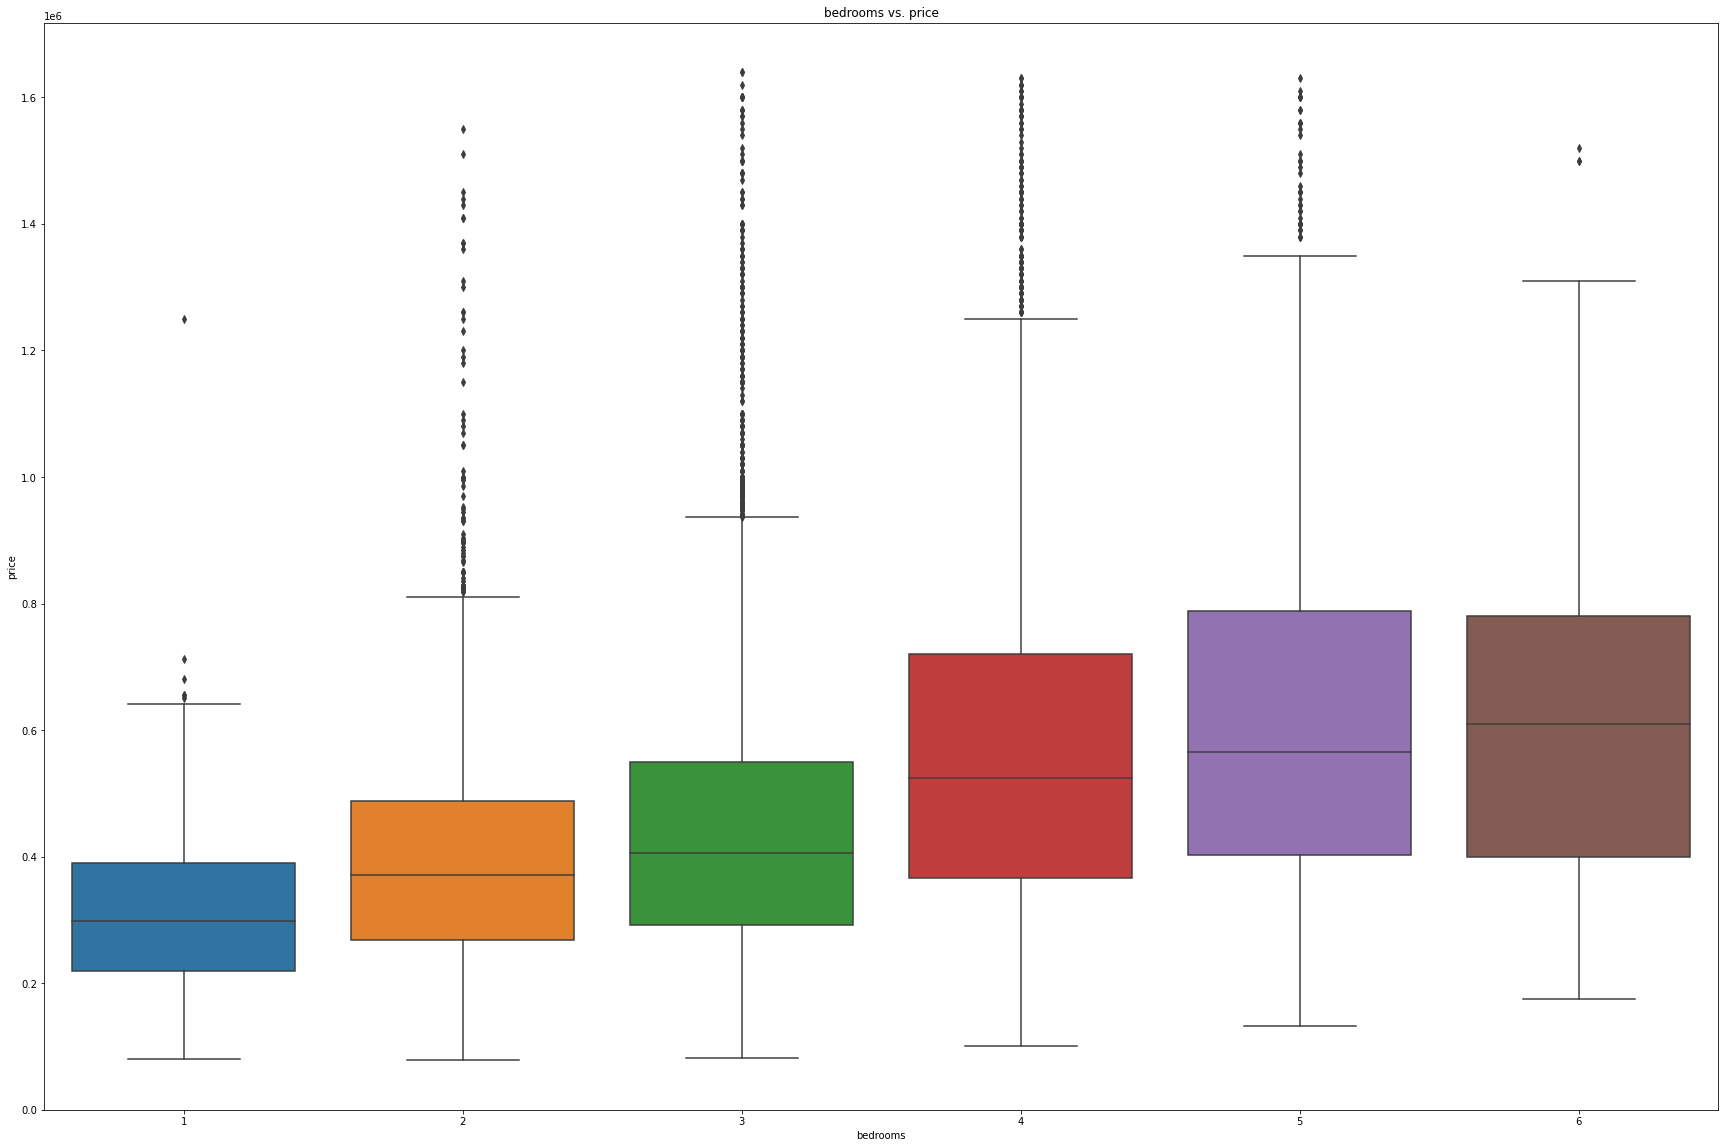

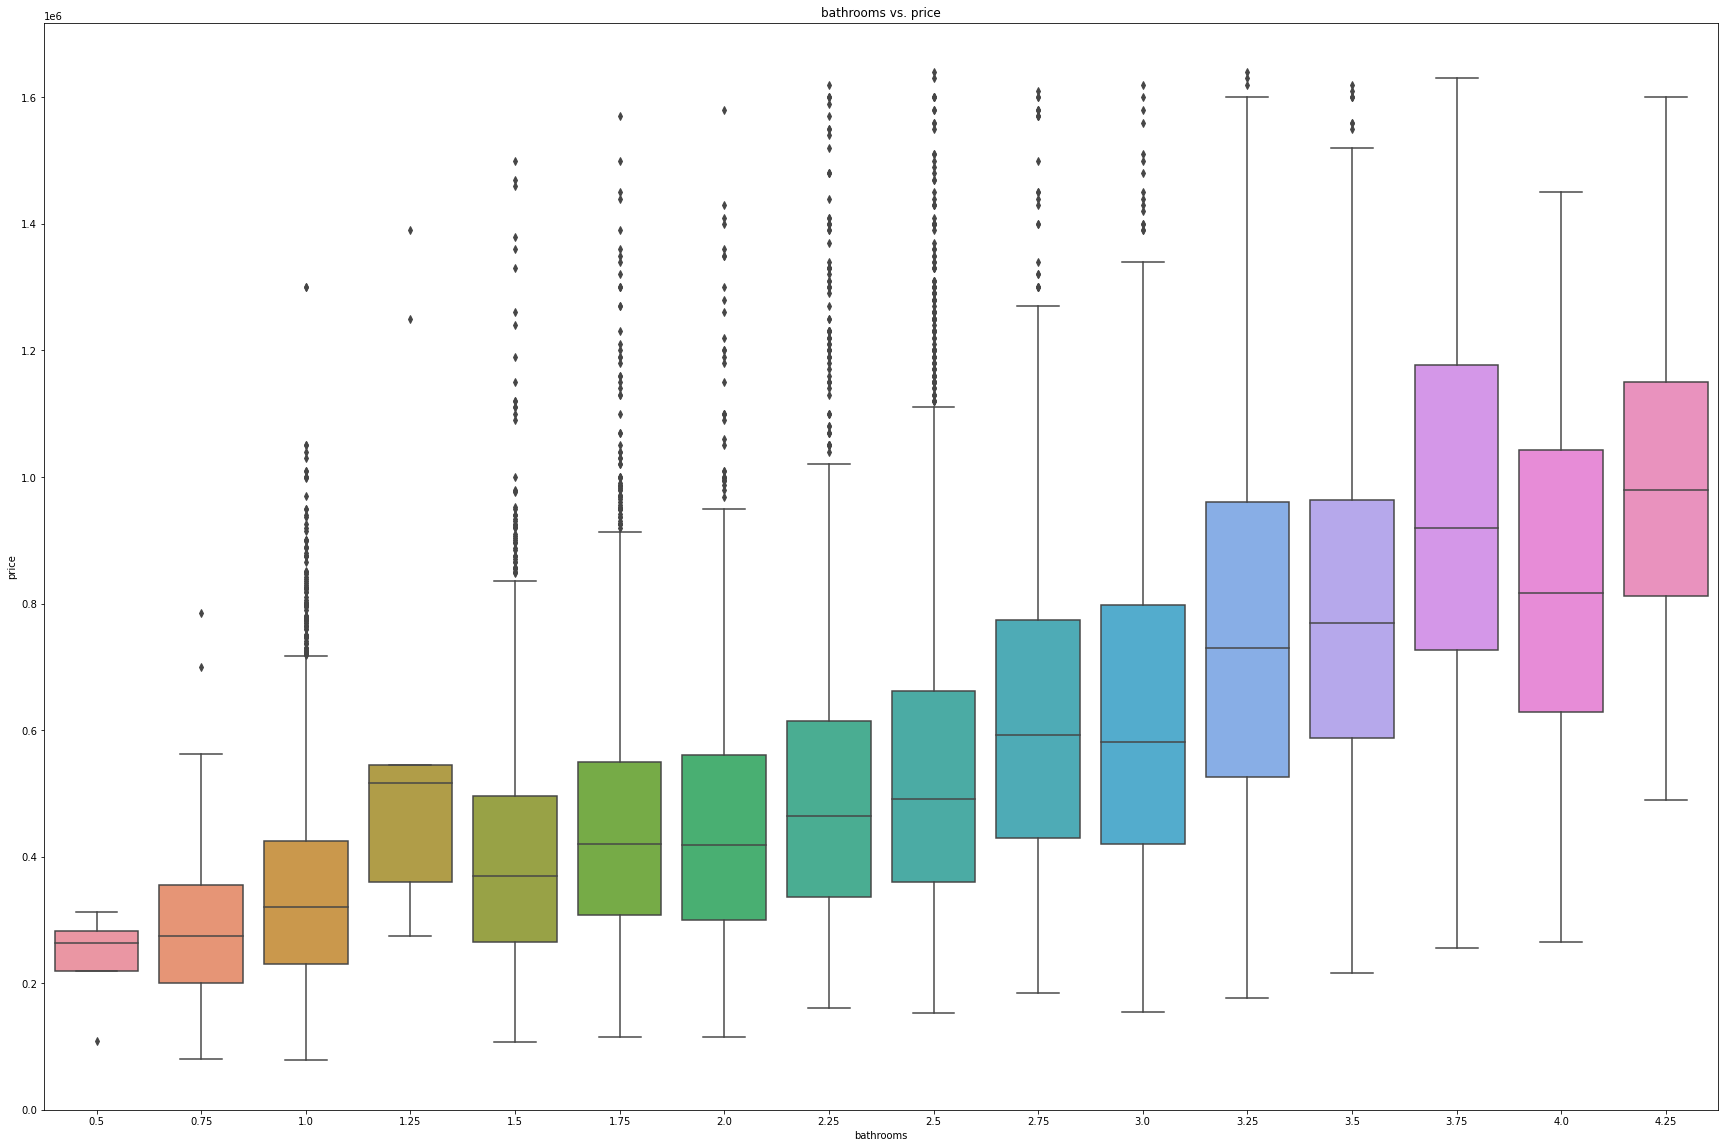

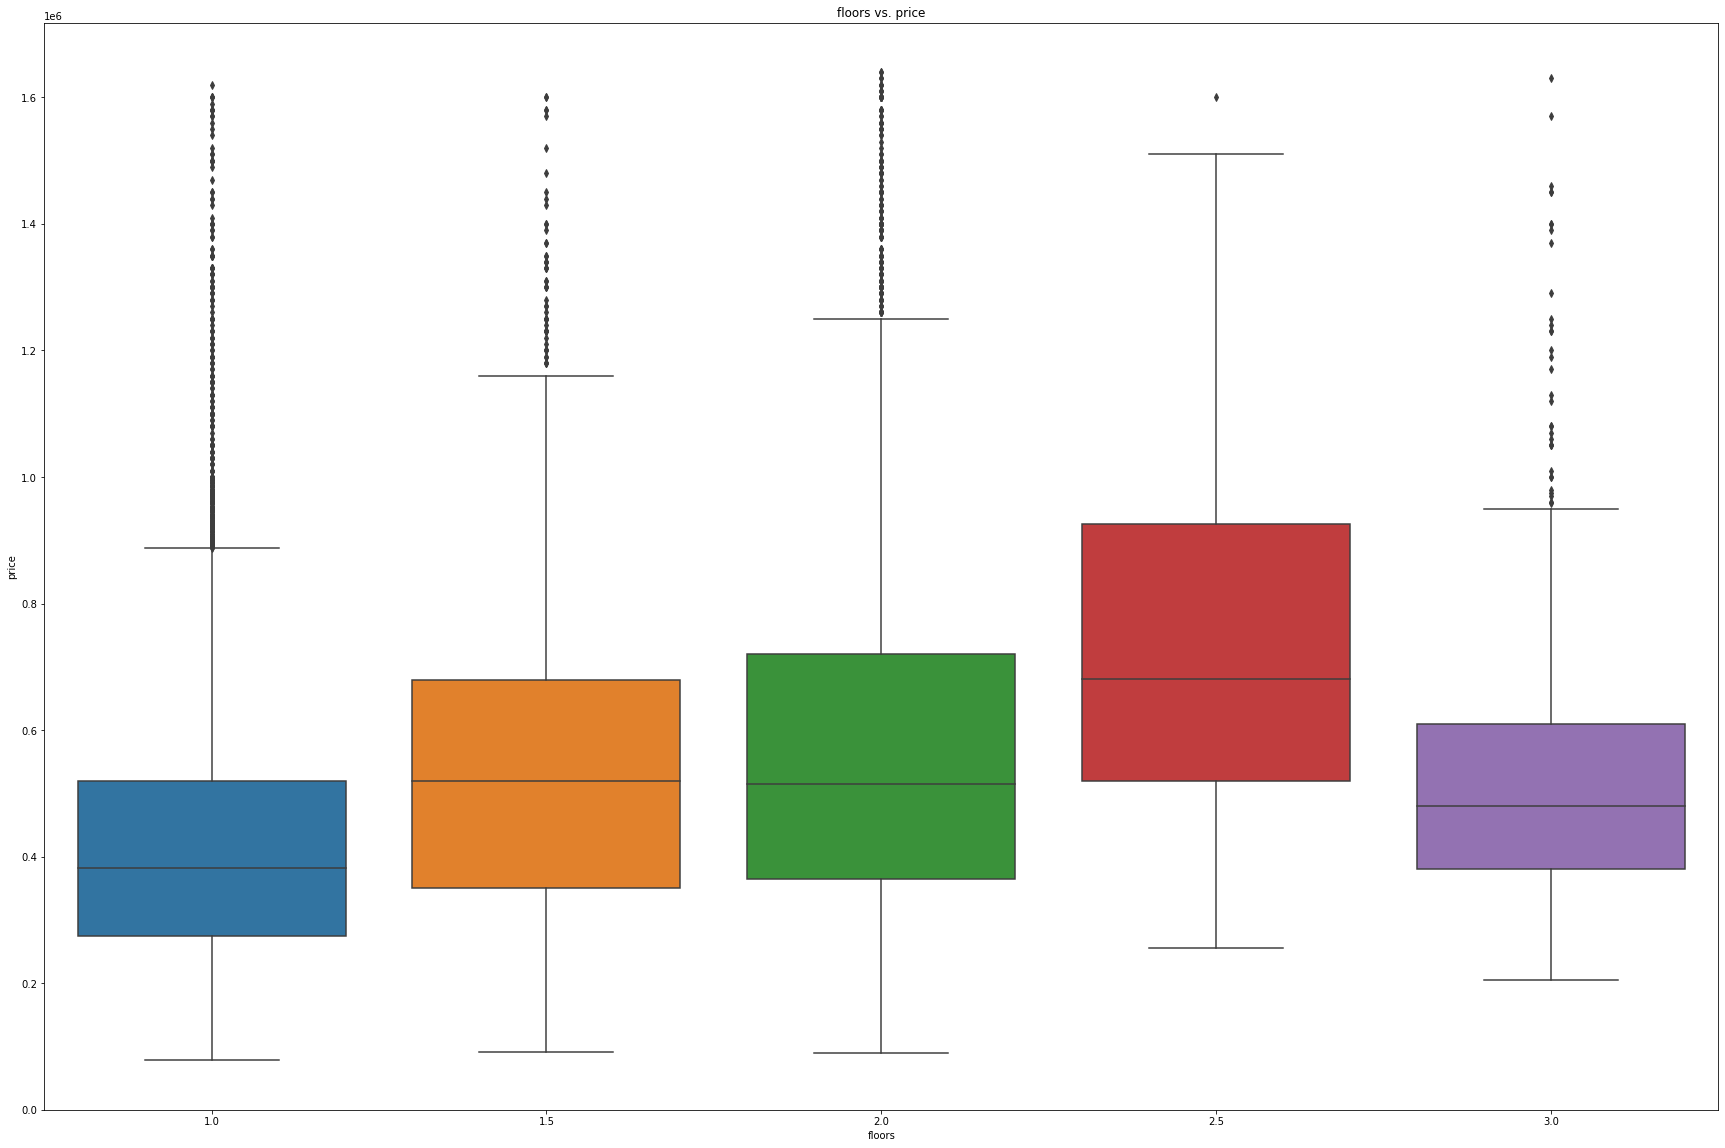

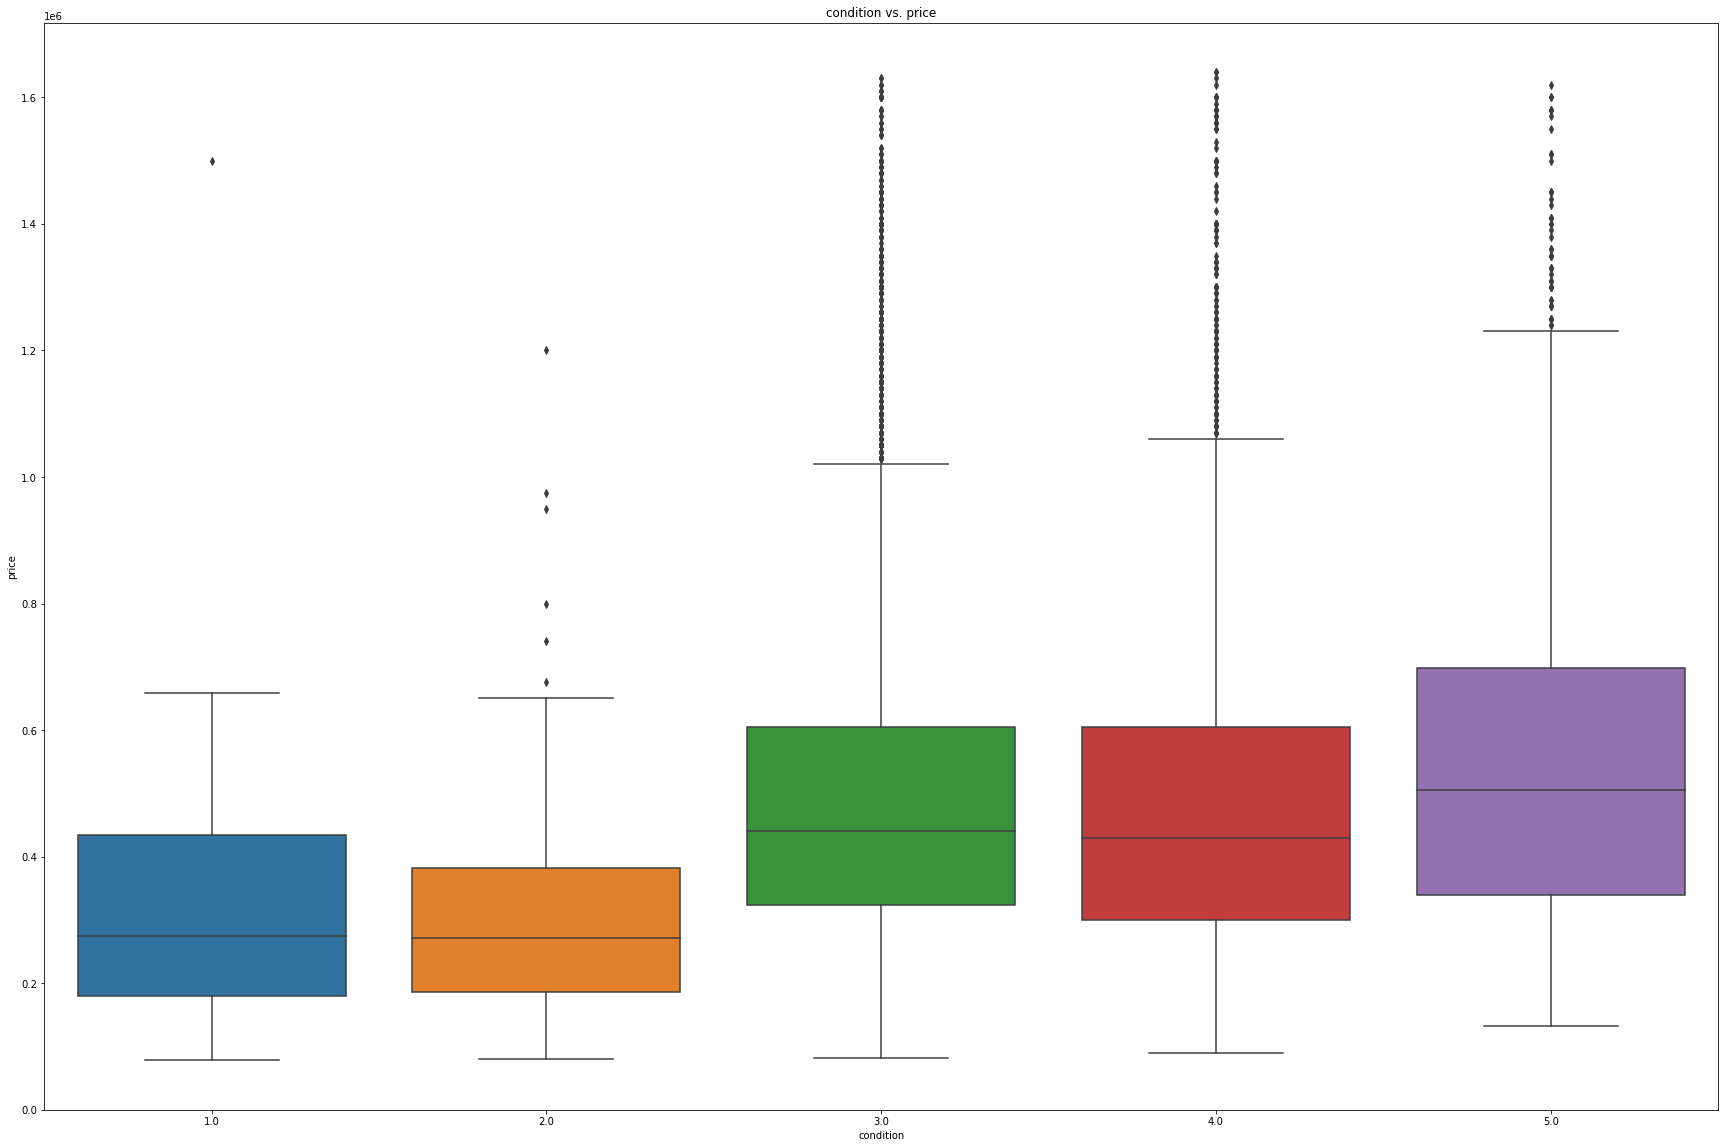

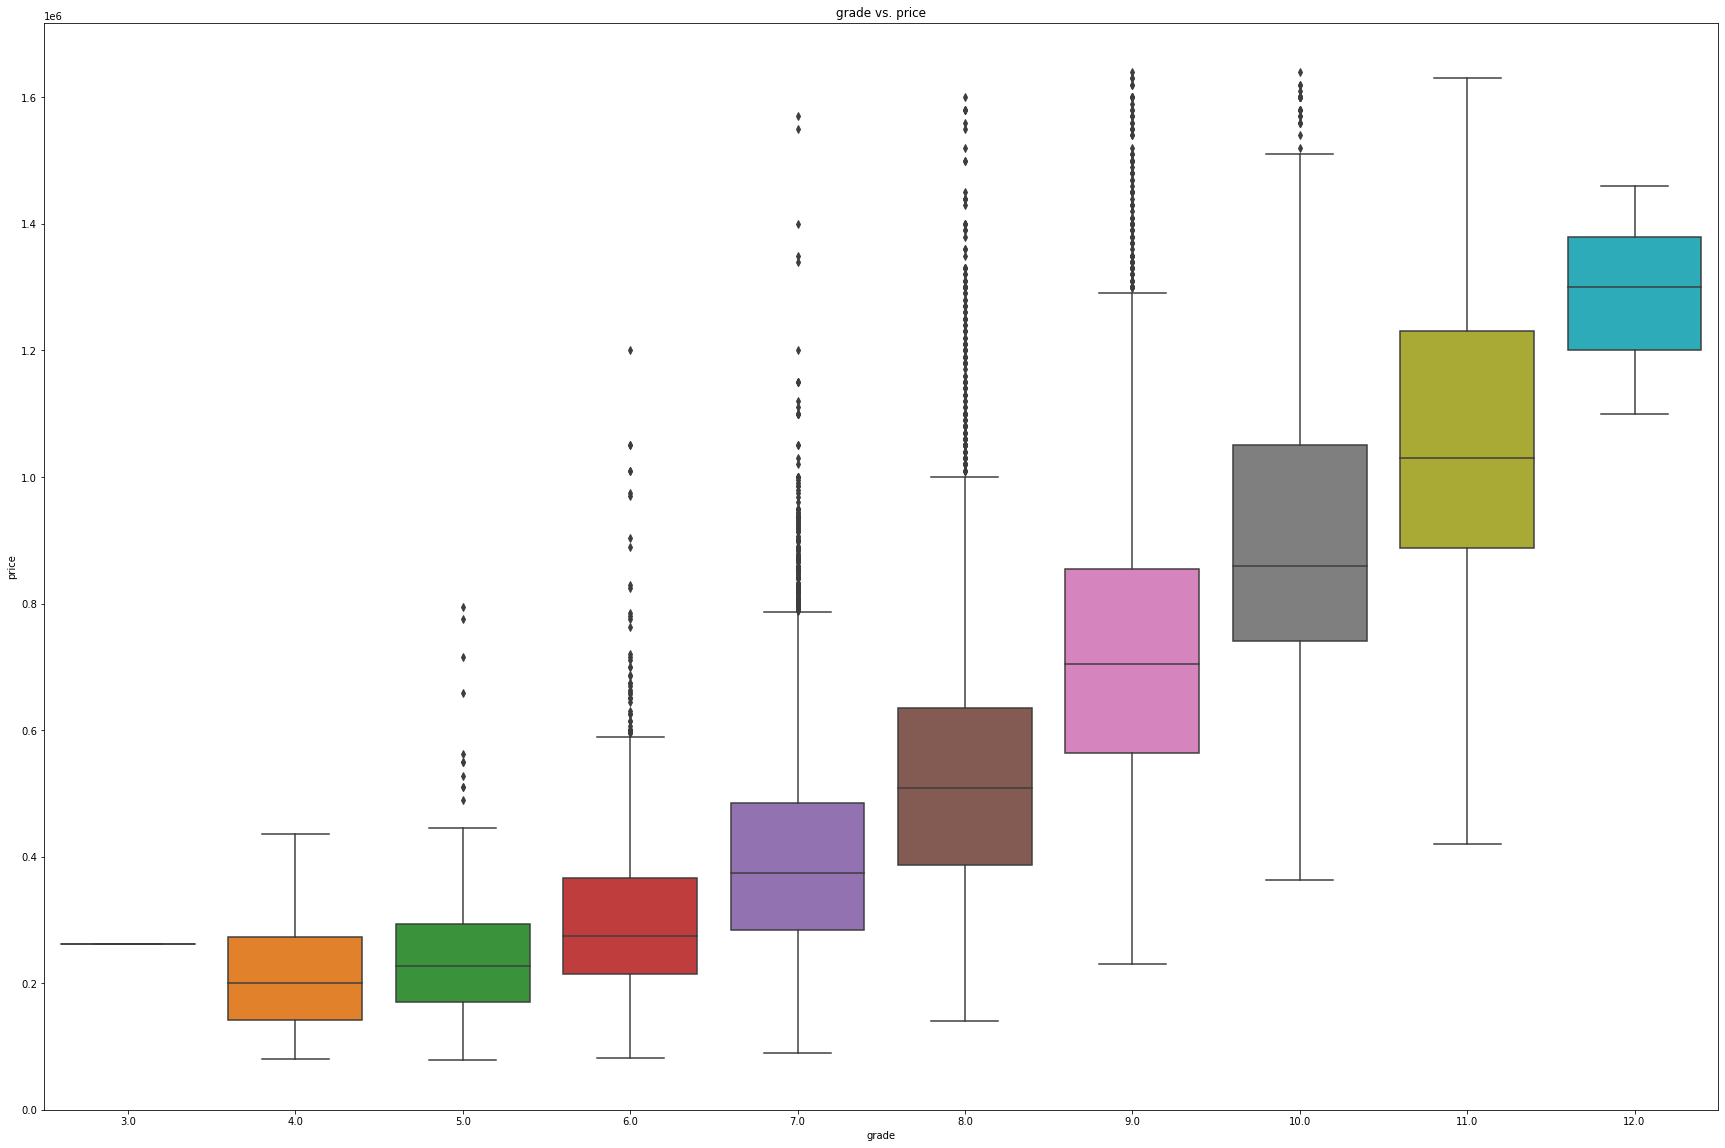

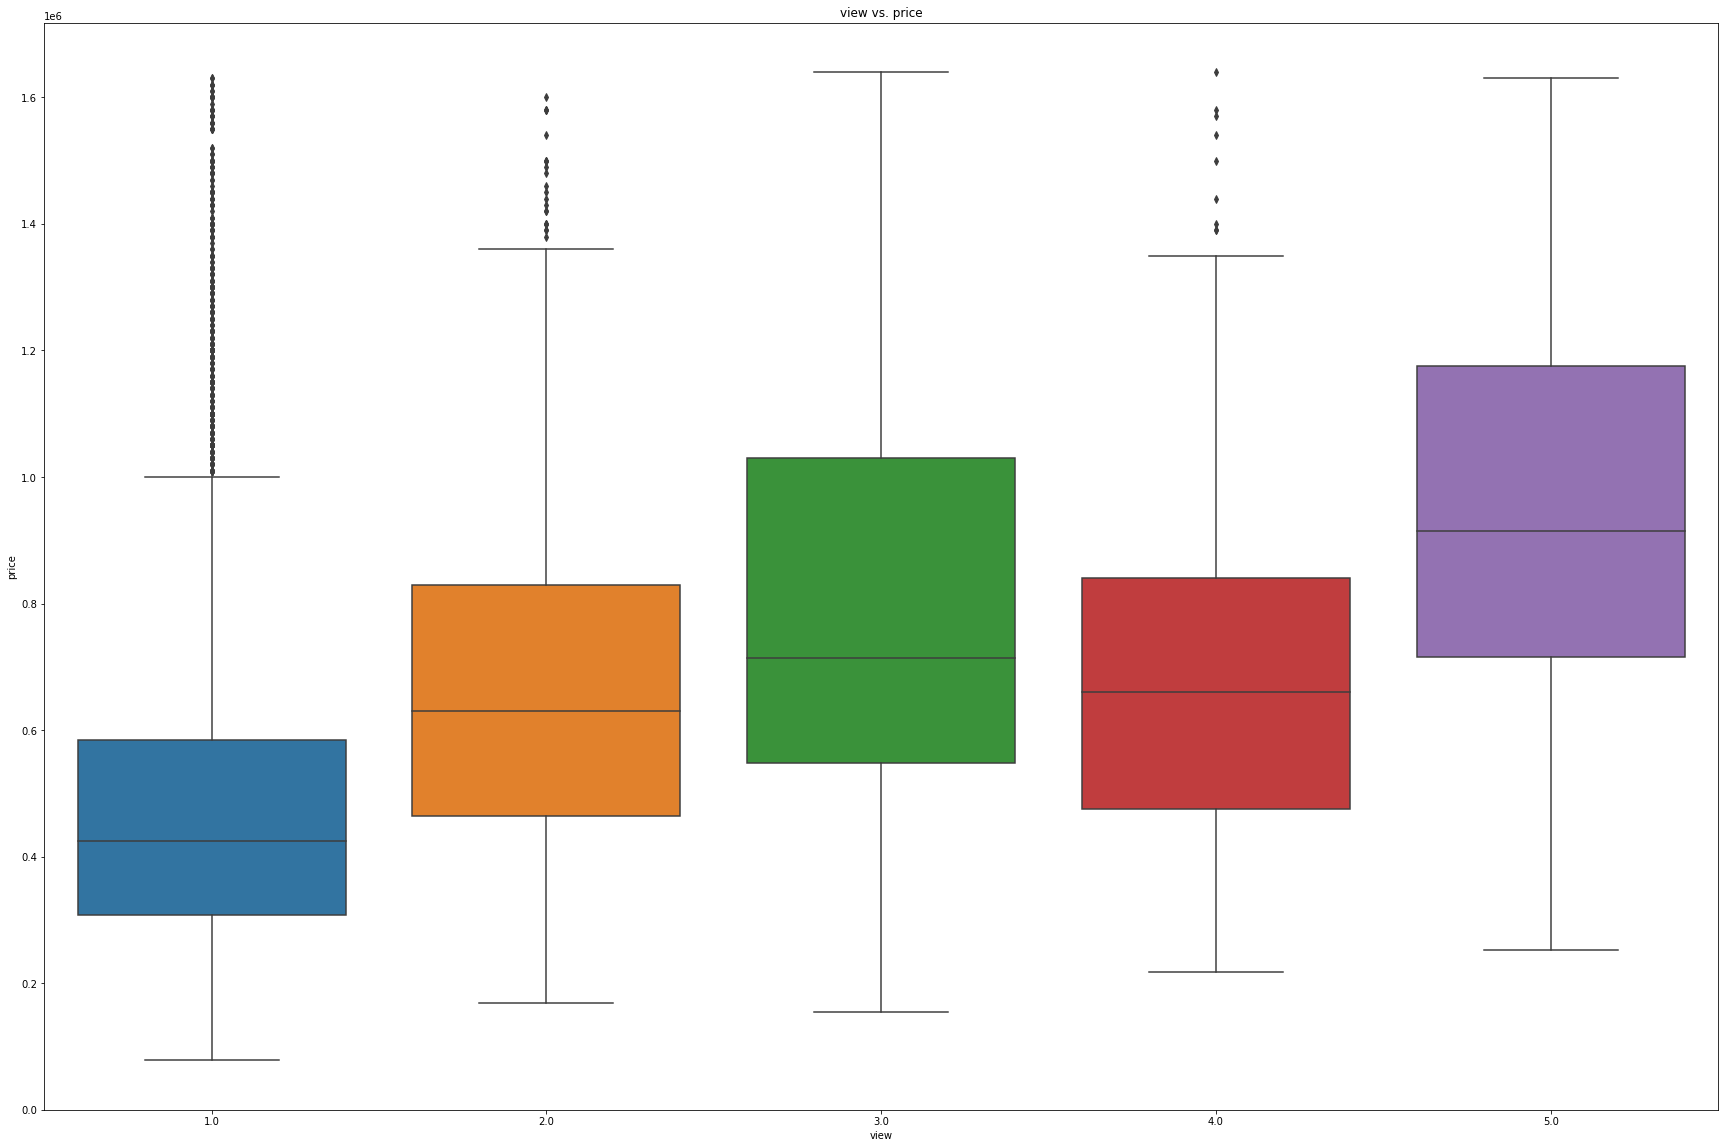

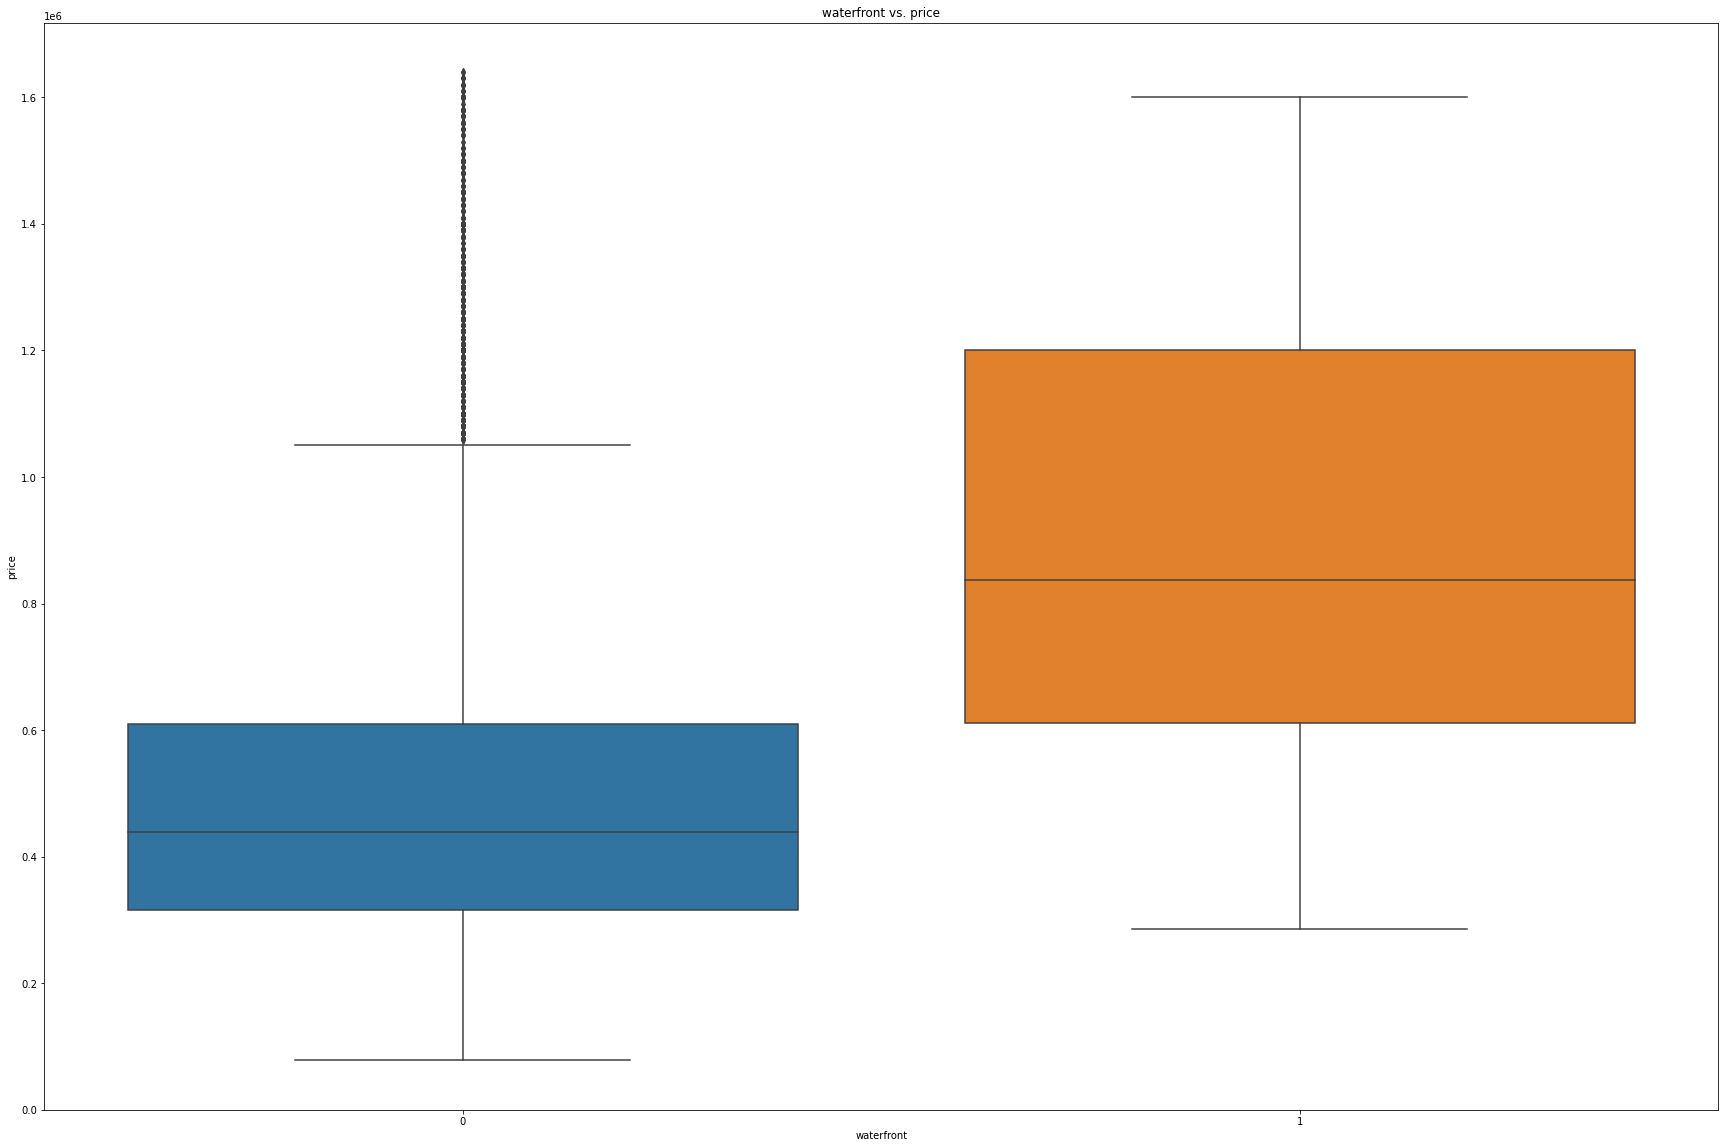

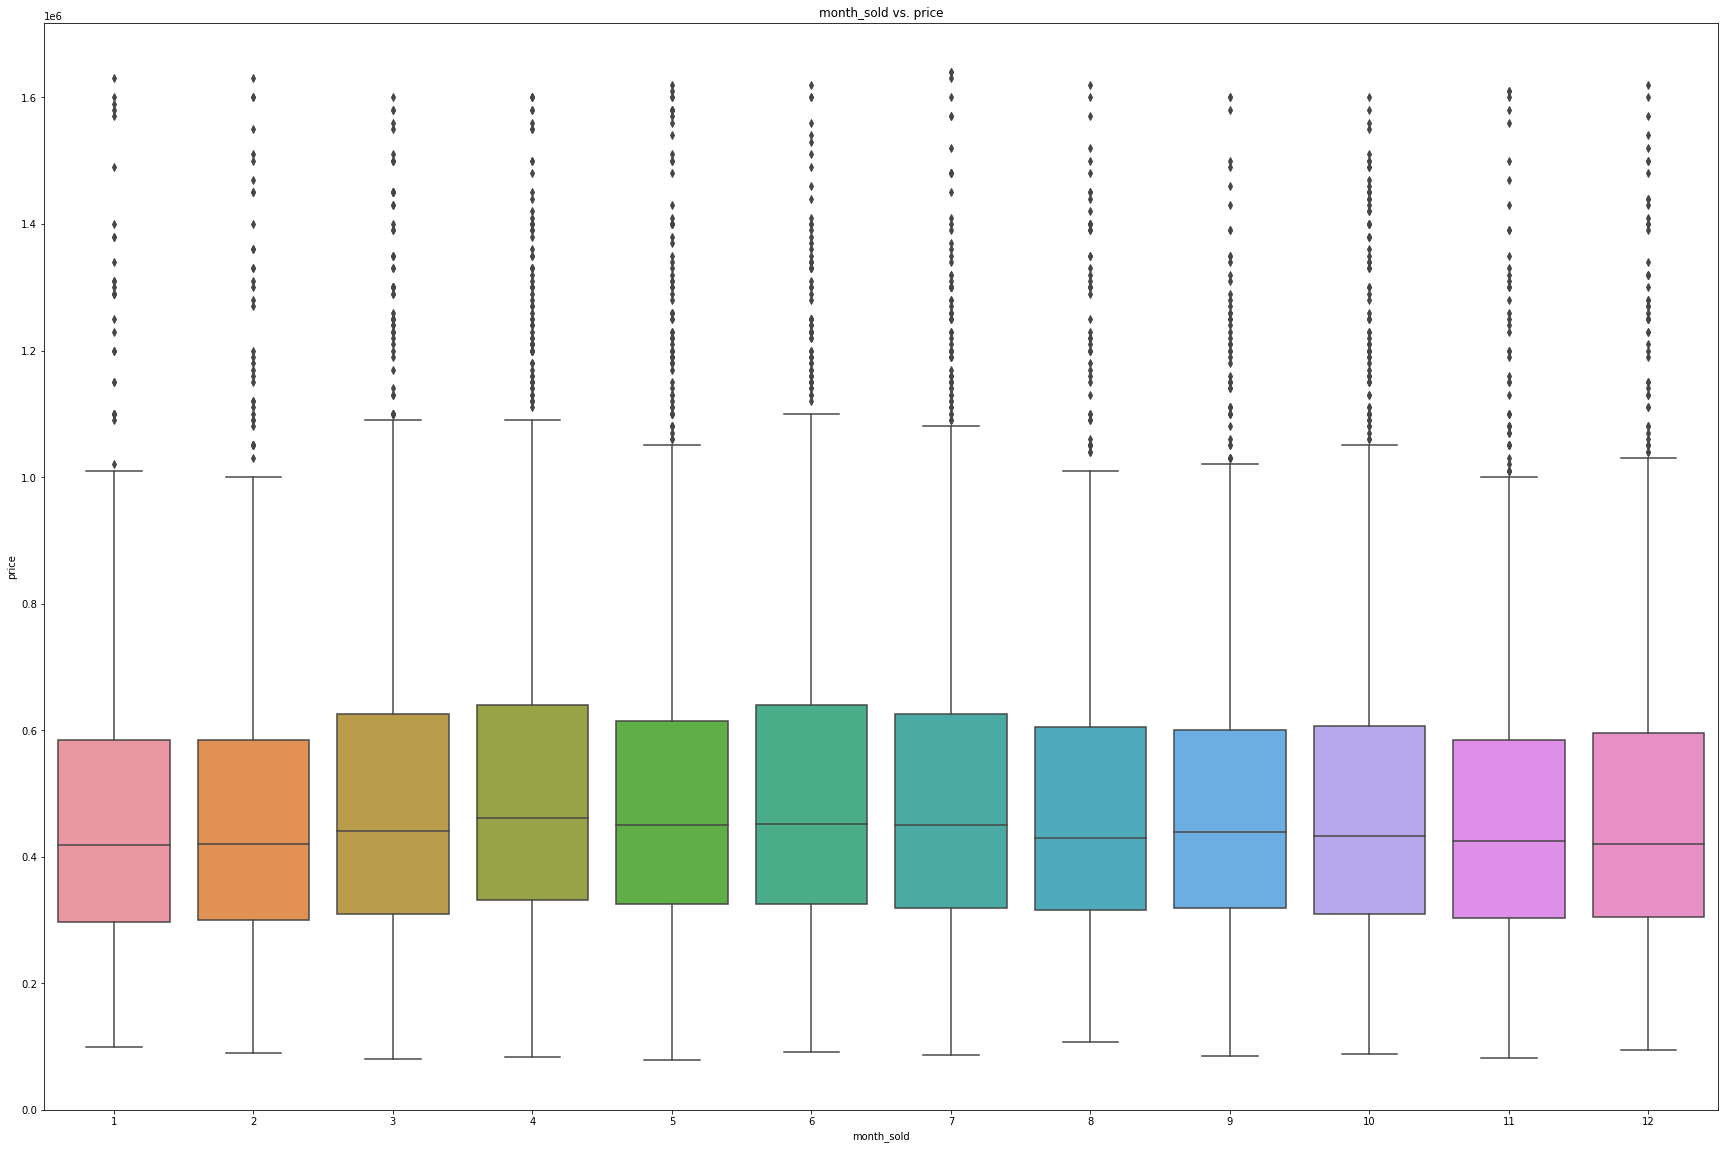

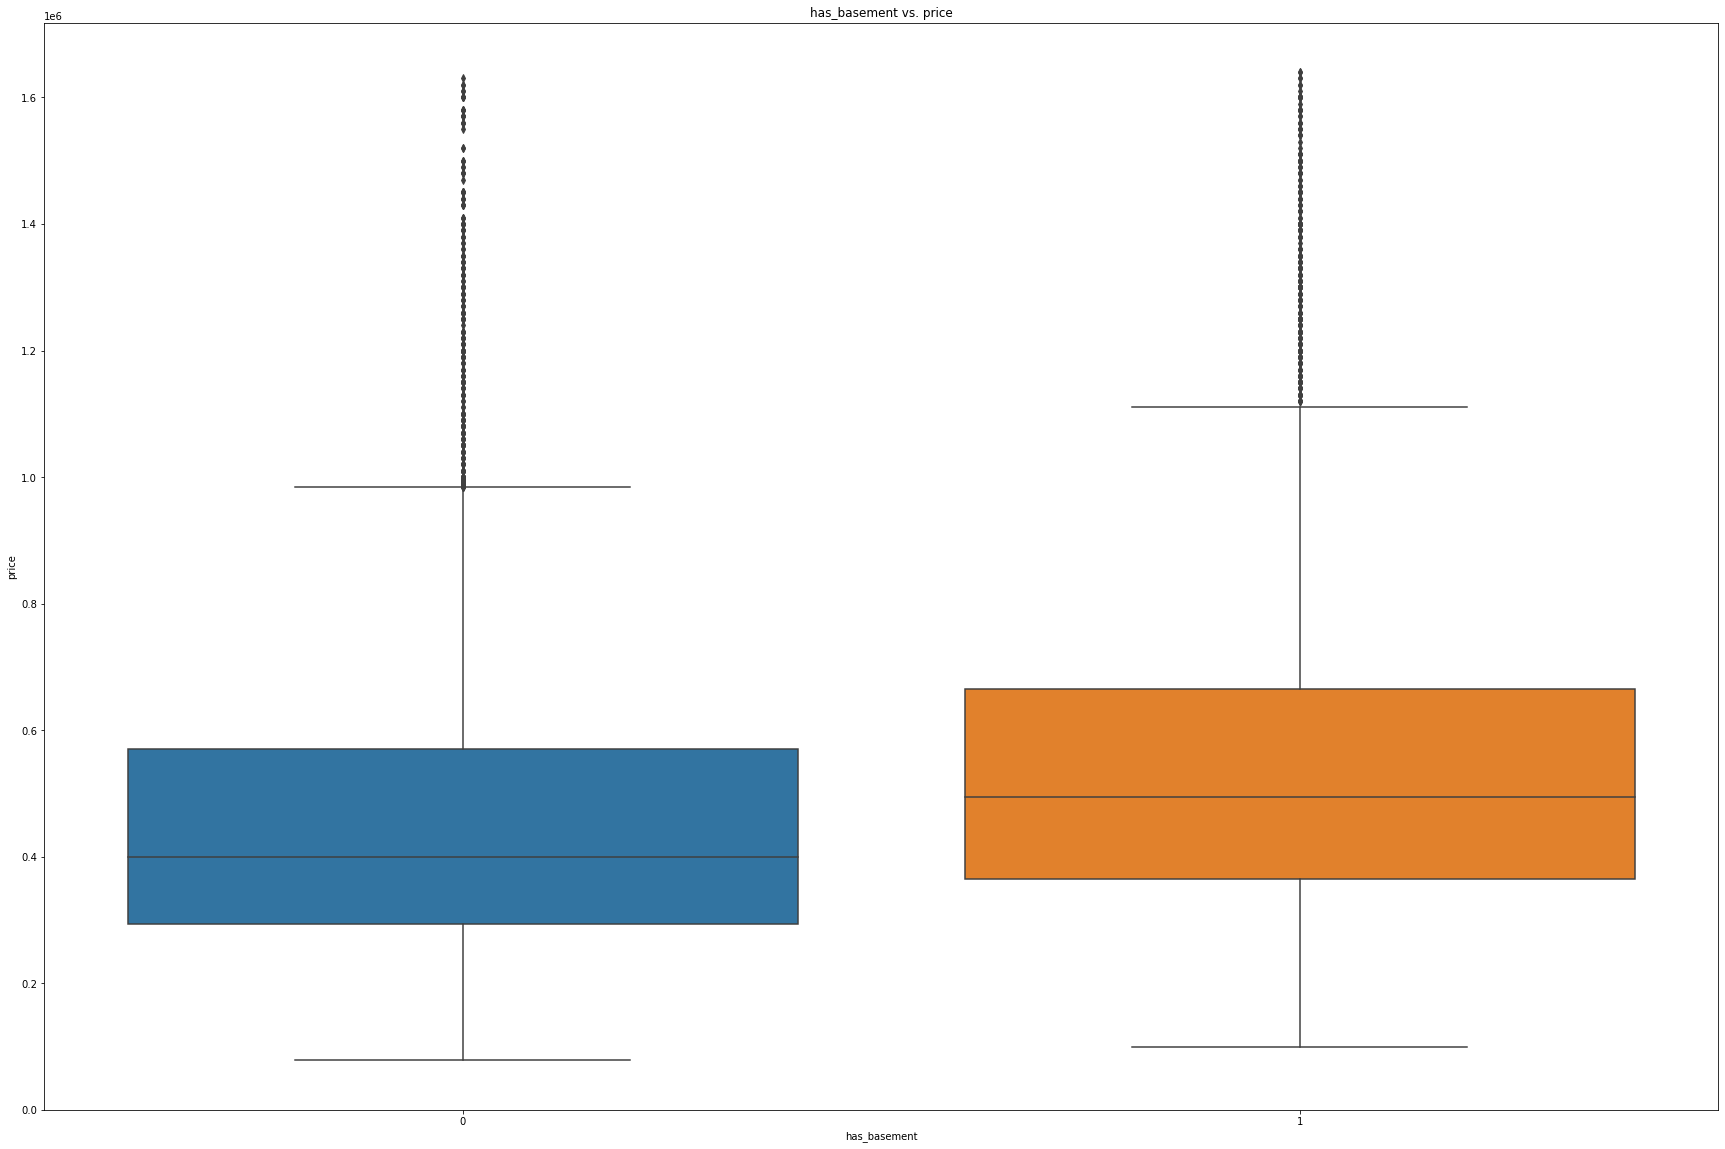

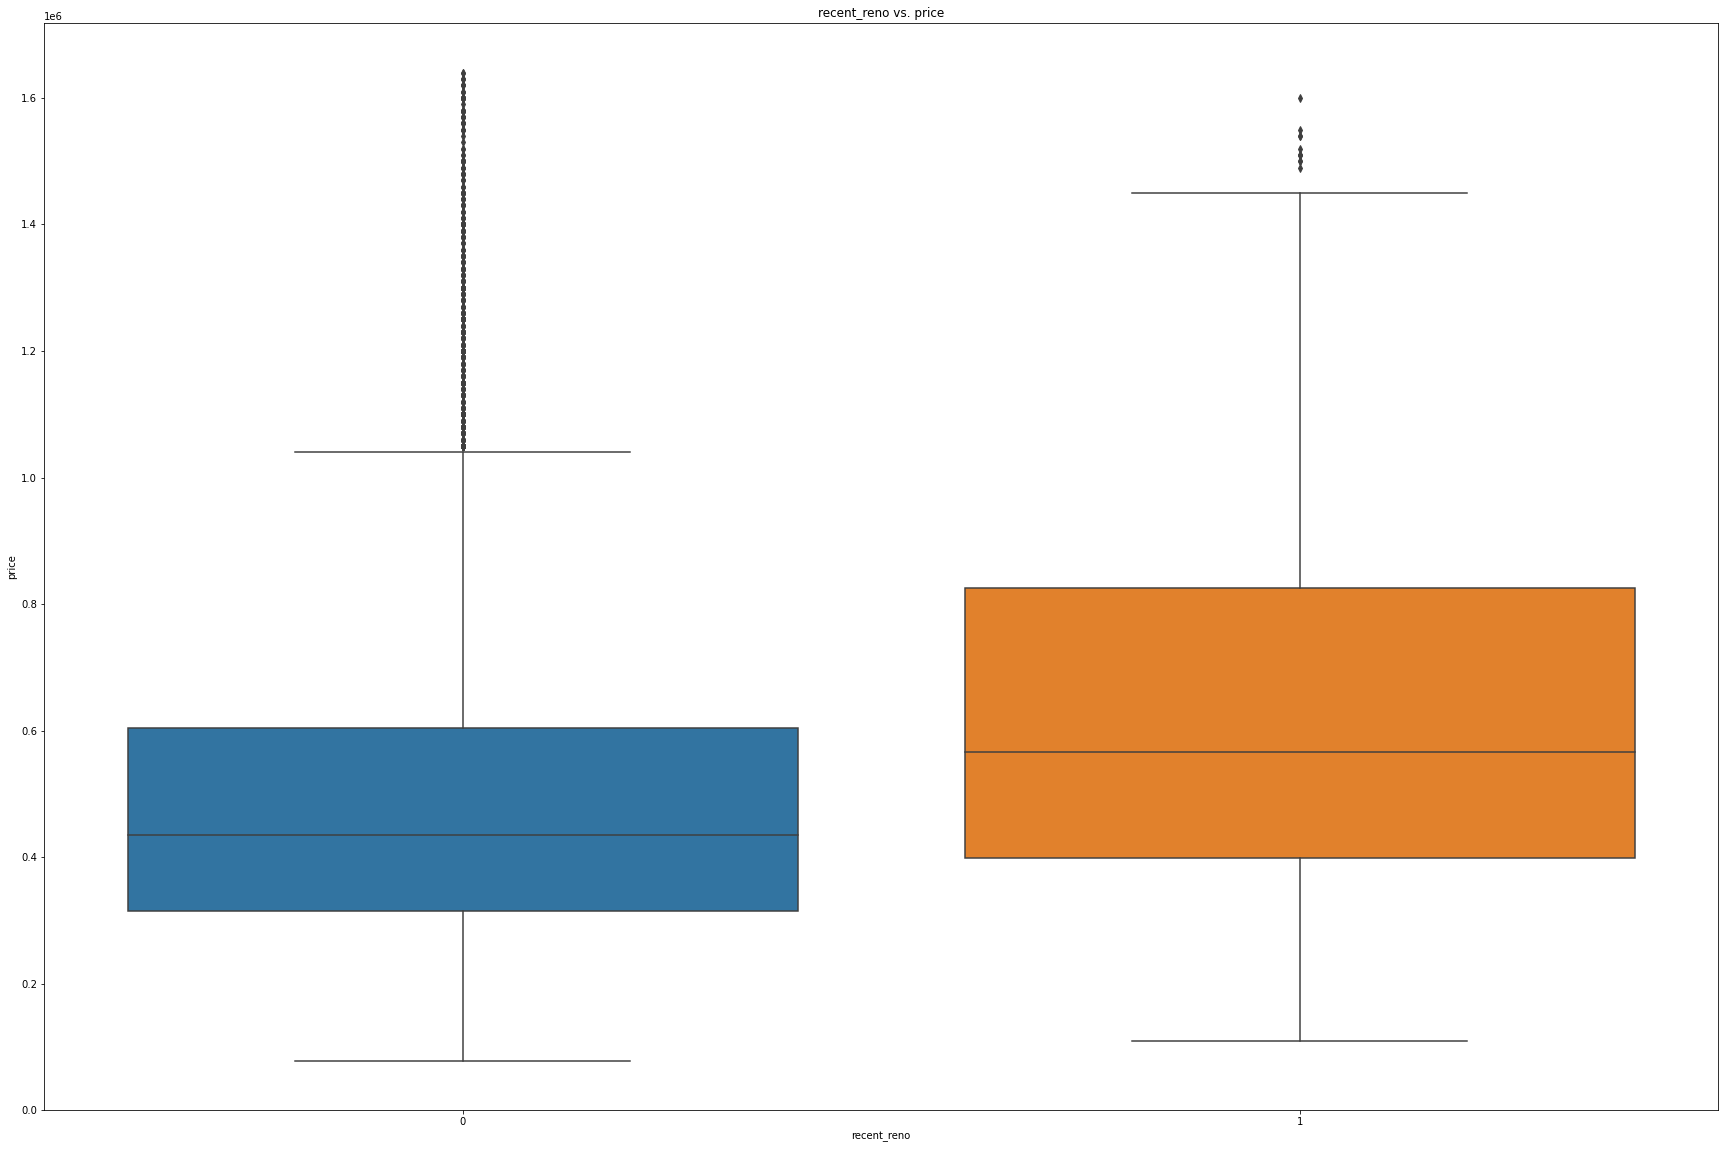

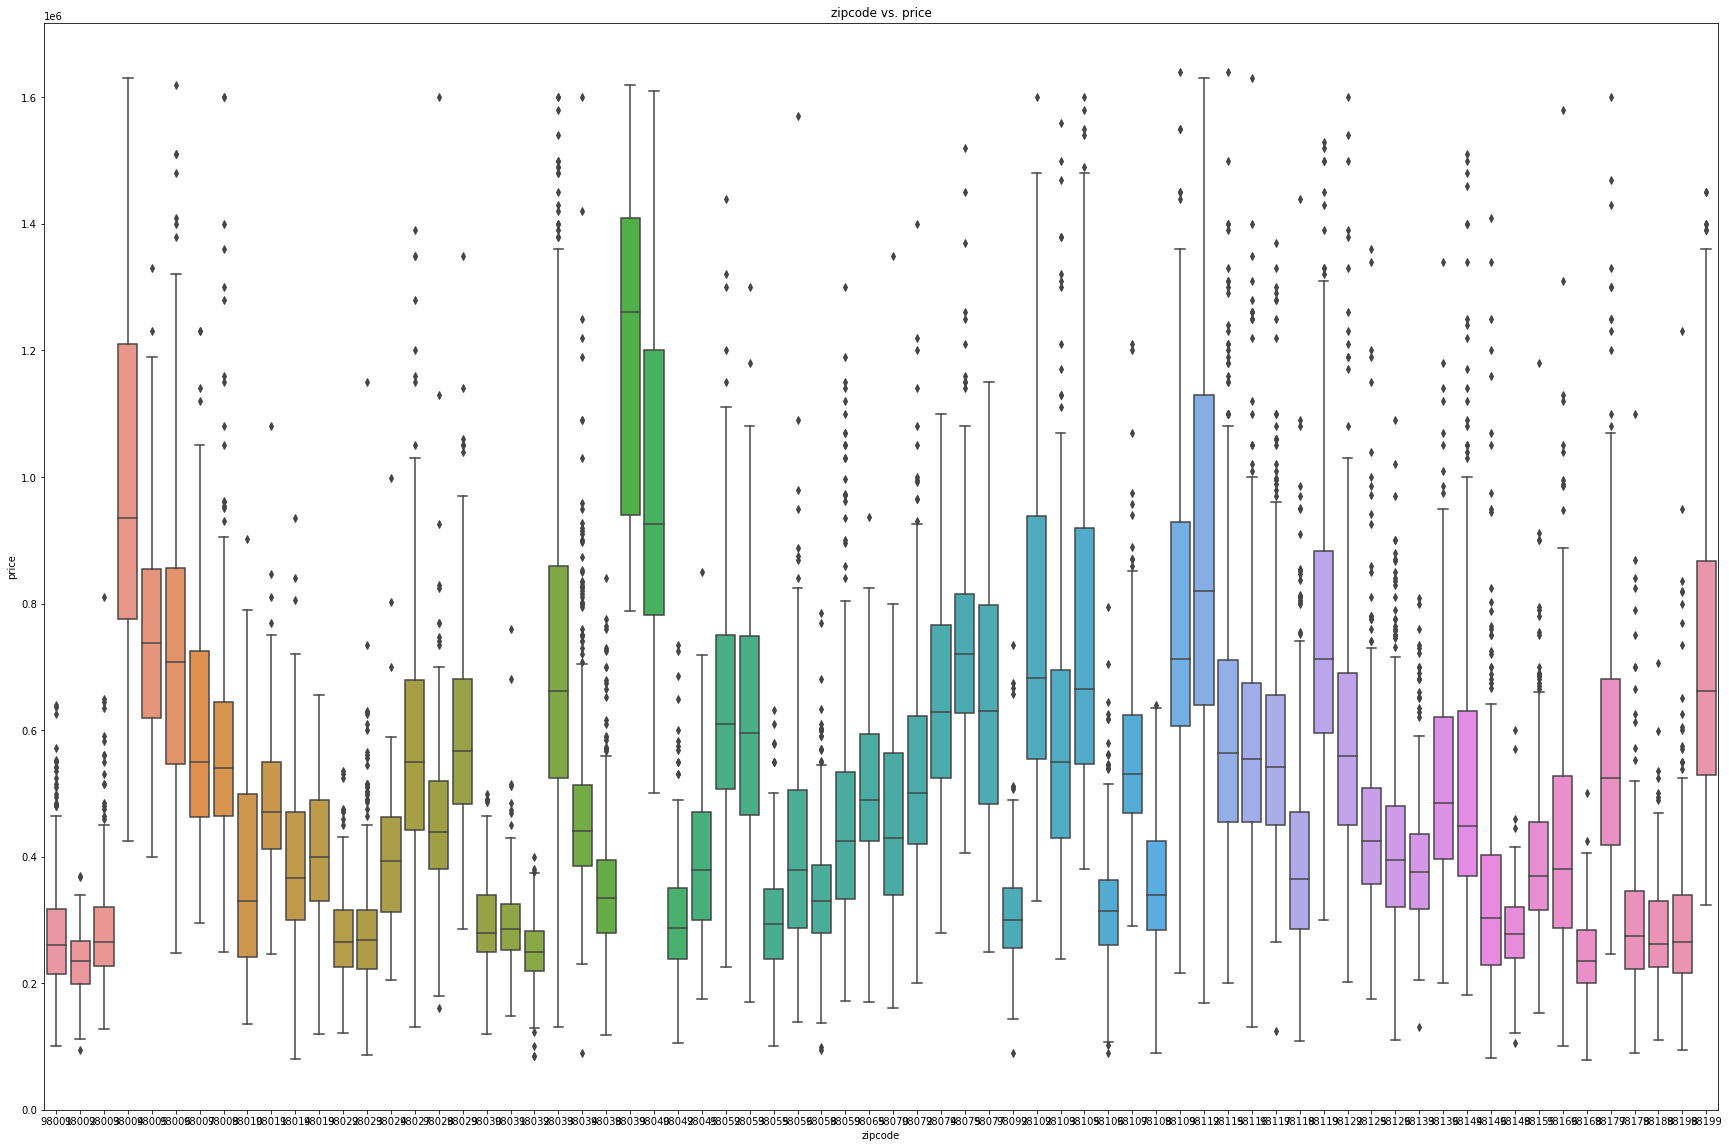

In [976]:
for variable in (kindaboth+categorical):
    ax, figure = plt.subplots(1,1,figsize=(30,20))
    sns.boxplot(x=variable, y='price', data=df)
    plt.title("{} vs. price".format(variable))

In [977]:
df2 = df.copy()

In [978]:
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,sqft_living15,month_sold,age_when_sold,has_basement,recent_reno
0,221900.0,3,1.00,1180,5650,1.0,0,1.0,3.0,7.0,98178,1340,10,59,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,1.0,3.0,7.0,98125,1690,12,63,1,1
2,180000.0,2,1.00,770,10000,1.0,0,1.0,3.0,6.0,98028,2720,2,82,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,1.0,5.0,7.0,98136,1360,12,49,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,1.0,3.0,8.0,98074,1800,2,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,1.0,3.0,8.0,98103,1530,5,5,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0,1.0,3.0,8.0,98146,1830,2,1,0,0
21594,402101.0,2,0.75,1020,1350,2.0,0,1.0,3.0,7.0,98144,1020,6,5,0,0
21595,400000.0,3,2.50,1600,2388,2.0,0,1.0,3.0,8.0,98027,1410,1,11,0,0


In [979]:
df2[categorical].nunique()

waterfront       2
month_sold      12
has_basement     2
recent_reno      2
zipcode         70
dtype: int64

In [980]:
df_categories = pd.DataFrame()

for cat in categorical:
    df_categories[cat]=df2[cat].astype('category')
    df_dummy = pd.get_dummies(df_categories[cat], prefix=cat, drop_first=True) 
    df_categories = df_categories.join(df_dummy)
    df_categories.drop(labels=cat, axis=1, inplace=True)

In [981]:
df_categories

,waterfront_1,month_sold_2,month_sold_3,month_sold_4,month_sold_5,month_sold_6,month_sold_7,month_sold_8,month_sold_9,month_sold_10,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [982]:
dfohe= df2.drop(categorical, axis=1)
dfohe = pd.concat([dfohe, df_categories], axis=1)
dfohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20239 entries, 0 to 21596
Data columns (total 94 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           20239 non-null  float64
 1   bedrooms        20239 non-null  int64  
 2   bathrooms       20239 non-null  float64
 3   sqft_living     20239 non-null  int64  
 4   sqft_lot        20239 non-null  int64  
 5   floors          20239 non-null  float64
 6   view            20239 non-null  float64
 7   condition       20239 non-null  float64
 8   grade           20239 non-null  float64
 9   sqft_living15   20239 non-null  int64  
 10  age_when_sold   20239 non-null  int64  
 11  waterfront_1    20239 non-null  uint8  
 12  month_sold_2    20239 non-null  uint8  
 13  month_sold_3    20239 non-null  uint8  
 14  month_sold_4    20239 non-null  uint8  
 15  month_sold_5    20239 non-null  uint8  
 16  month_sold_6    20239 non-null  uint8  
 17  month_sold_7    20239 non-null 

In [983]:
dfohe.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,1.0,3.0,7.0,1340,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,1.0,3.0,7.0,1690,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,1.0,3.0,6.0,2720,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1.0,5.0,7.0,1360,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,1.0,3.0,8.0,1800,...,0,0,0,0,0,0,0,0,0,0
6,257500.0,3,2.25,1715,6819,2.0,1.0,3.0,7.0,2238,...,0,0,0,0,0,0,0,0,0,0
7,291850.0,3,1.50,1060,9711,1.0,1.0,3.0,7.0,1650,...,0,0,0,0,0,0,0,0,1,0
8,229500.0,3,1.00,1780,7470,1.0,1.0,3.0,7.0,1780,...,1,0,0,0,0,0,0,0,0,0
9,323000.0,3,2.50,1890,6560,2.0,1.0,3.0,7.0,2390,...,0,0,0,0,0,0,0,0,0,0
11,468000.0,2,1.00,1160,6000,1.0,1.0,4.0,7.0,1330,...,0,0,0,0,0,0,0,0,0,0


In [984]:
sm.OLS(dfohe['price'], sm.add_constant(dfohe.drop("price",axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1056.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:56:31   Log-Likelihood:            -2.6197e+05
No. Observations:               20239   AIC:                         5.241e+05
Df Residuals:                   20145   BIC:                         5.249e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.534e+05   1.12e+04    -49.541      0.000   -5.75e+05   -5.31e+05
bedrooms       -8294.8501   1107.492     -7.490      0.000   -1.05e+04   -6124.076
bathrooms        1.89e+04   1820.661     10.382      0.000    1.53e+04    2.25e+04
sqft_living      122.0316      2.103     58.037      0.000     117.910     126.153
sqft_lot           0.6547      0.071      9.211      0.000       0.515       0.794
floors          -1.28e+04   2038.731     -6.279      0.000   -1.68e+04   -8805.338
view            4.532e+04   1374.745     32.966      0.000    4.26e+04     4.8e+04
condition         2.4e+04   1253.140     19.150      0.000    2.15e+04    2.65e+04
grade           5.483e+04   1212.115     45.234      0.000    5.25e+04    5.72e+04
sqft_living15     30.3460      2.073     14.641      0.000      26.283      34.409
age_when_sold    631.2625     42.367     14.900      0.000     548.219     714.306
waterfront_1    2.749e+05   1.31e+04     21.010      0.000    2.49e+05    3.01e+05
month_sold_2    7635.9103   4489.513      1.701      0.089   -1163.902    1.64e+04
month_sold_3    2.375e+04   4153.651      5.717      0.000    1.56e+04    3.19e+04
month_sold_4    3.104e+04   4039.660      7.683      0.000    2.31e+04     3.9e+04
month_sold_5    3507.2999   4007.874      0.875      0.382   -4348.462    1.14e+04
month_sold_6    -220.4023   4059.749     -0.054      0.957   -8177.841    7737.037
month_sold_7   -2817.8282   4055.080     -0.695      0.487   -1.08e+04    5130.461
month_sold_8   -5026.5575   4137.090     -1.215      0.224   -1.31e+04    3082.477
month_sold_9   -9764.0580   4193.525     -2.328      0.020    -1.8e+04   -1544.405
month_sold_10  -4674.9957   4159.532     -1.124      0.261   -1.28e+04    3478.028
month_sold_11  -5509.0760   4383.144     -1.257      0.209   -1.41e+04    3082.245
month_sold_12  -2373.3662   4350.982     -0.545      0.585   -1.09e+04    6154.914
has_basement_1 -2.907e+04   1873.207    -15.521      0.000   -3.27e+04   -2.54e+04
recent_reno_1   3.672e+04   4286.641      8.565      0.000    2.83e+04    4.51e+04
zipcode_98002   1.819e+04   9059.914      2.008      0.045     431.950    3.59e+04
zipcode_98003  -5096.0265   8165.758     -0.624      0.533   -2.11e+04    1.09e+04
zipcode_98004   6.015e+05   8790.671     68.423      0.000    5.84e+05    6.19e+05
zipcode_98005   3.218e+05   1.01e+04     31.999      0.000    3.02e+05    3.42e+05
zipcode_98006   2.653e+05   7466.412     35.535      0.000    2.51e+05     2.8e+05
zipcode_98007   2.483e+05   1.03e+04     24.105      0.000    2.28e+05    2.68e+05
zipcode_98008   2.413e+05   8221.614     29.355      0.000    2.25e+05    2.57e+05
zipcode_98010   8.372e+04   1.25e+04      6.684      0.000    5.92e+04    1.08e+05
zipcode_98011   1.376e+05   9127.742     15.080      0.000     1.2e+05    1.56e+05
zipcode_9801

In [985]:
third_model = LinearRegression()

third_model_scores = cross_validate(
    estimator=third_model,
    X=dfohe.drop("price",axis=1),
    # y=df2logprice,
    y=dfohe['price'],
    return_train_score=True,
    cv=splitter
)

print("Current Model (OHE of categorical features only)")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()

# print("Second Second Model (log transform price)")
# print("Train score:     ", second2_model_scores["train_score"].mean())
# print("Validation score:", second2_model_scores["test_score"].mean())
# print()

print("Second Model (using all features)")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()

print("Baseline Model (just using most correlated feature)")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model (OHE of categorical features only)
Train score:      0.8305401712031882
Validation score: 0.8264880140001442

Second Model (using all features)
Train score:      0.6061460881617369
Validation score: 0.6068163123426036

Baseline Model (just using most correlated feature)
Train score:      0.4047528946449441
Validation score: 0.4144106635099371


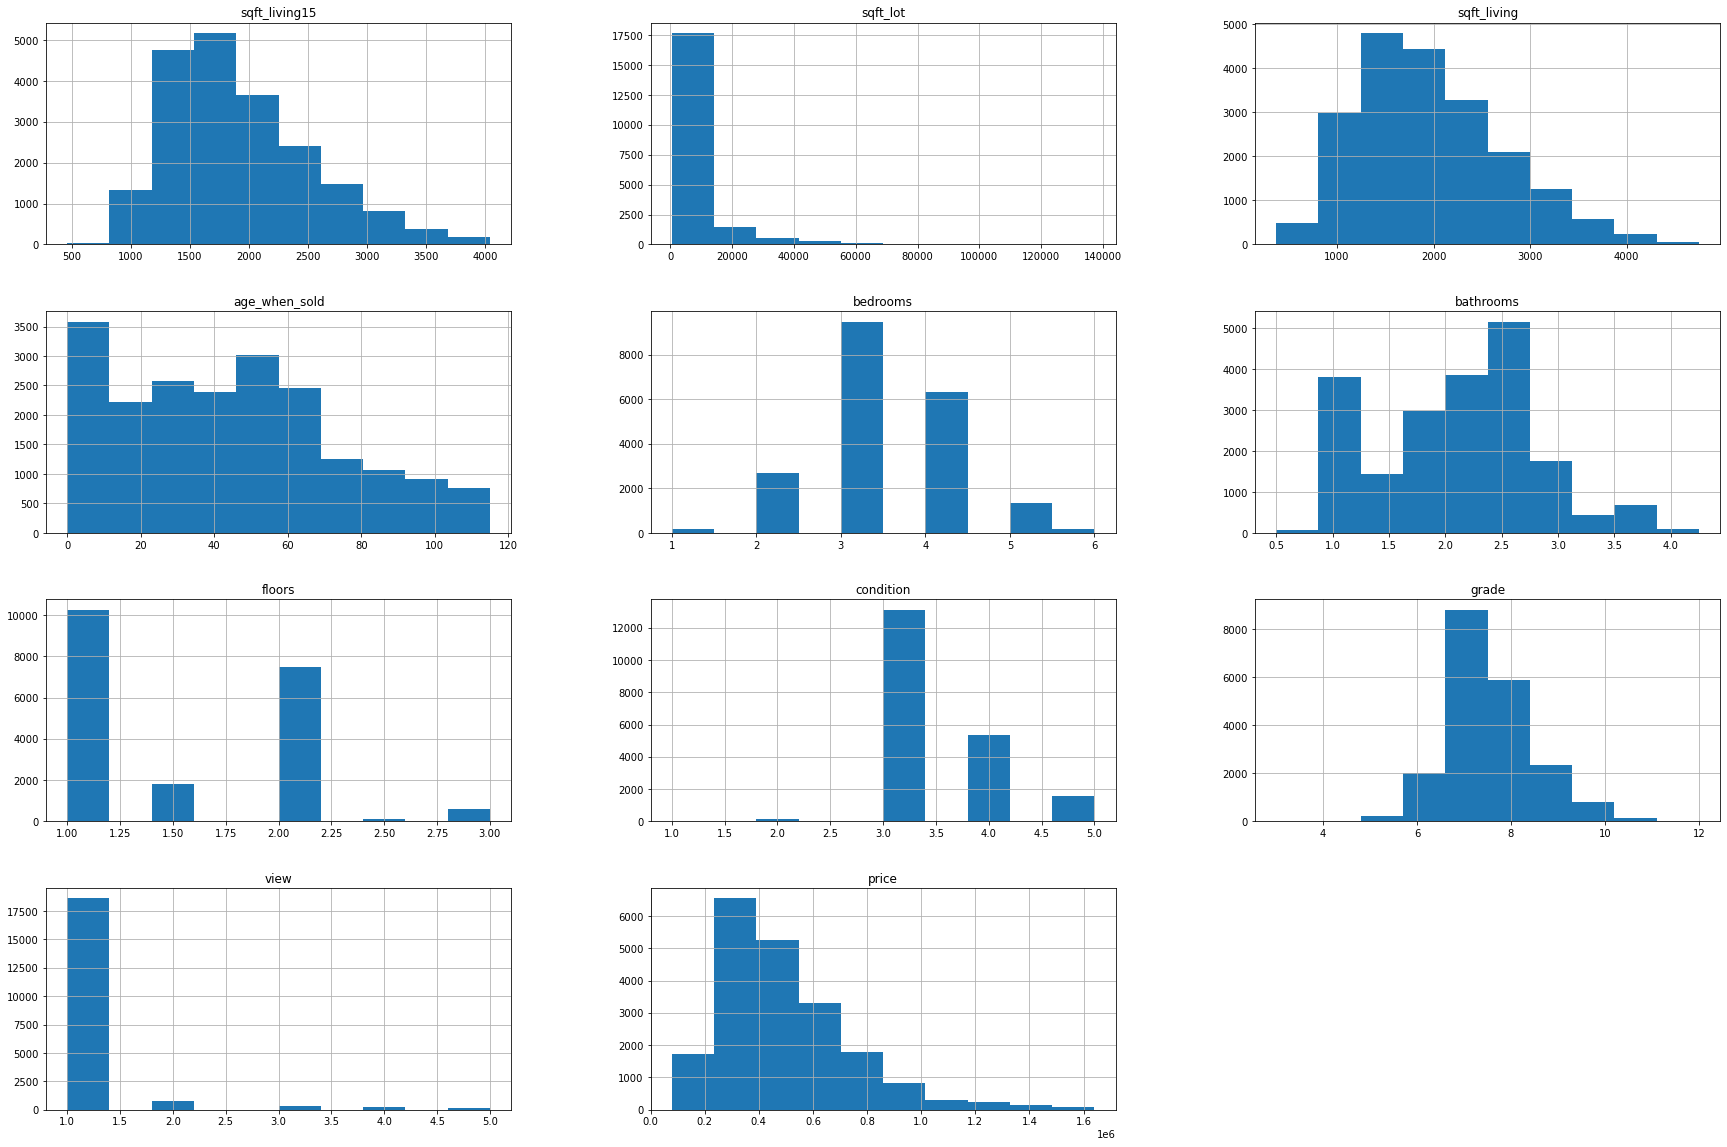

In [986]:
dfohe[numerical+kindaboth+['price']].hist(figsize = (30,20));

In [ ]:
# trylog = ['sqft_living15', 'sqft_lot','sqft_lot15', 'sqft_above', 'sqft_basement','price']

In [ ]:
# trylog = ['sqft_living15', 'sqft_lot','sqft_lot15', 'sqft_above','sqft_basement']

In [297]:
# trylog = ['sqft_living15', 'sqft_lot','sqft_living','sqft_basement']

In [224]:
# trylog = ['sqft_living15', 'sqft_lot','sqft_living','sqft_basement','price']

In [723]:
# trylog = ['sqft_living15', 'sqft_lot','sqft_living','price']

In [200]:
# trylog = ['sqft_lot']

In [987]:
trylog = numerical + kindaboth

In [126]:
# trylog = numerical

In [988]:
trylog

['sqft_living15',
 'sqft_lot',
 'sqft_living',
 'age_when_sold',
 'bedrooms',
 'bathrooms',
 'floors',
 'condition',
 'grade',
 'view']

In [992]:
dfohelog = dfohe.copy()

In [993]:
for feat in trylog:
    dfohelog[feat] = dfohelog[feat].map(lambda x: np.log1p(x))

In [990]:
# for feat in trylog:
#     dfohelog[feat] = dfohelog[feat].map(lambda x: np.log(x))

/var/folders/3l/m_ytvcc17dx3gywvs32jhbdr0000gp/T/ipykernel_8006/2372179723.py:2: RuntimeWarning: divide by zero encountered in log
  dfohelog[feat] = dfohelog[feat].map(lambda x: np.log(x))


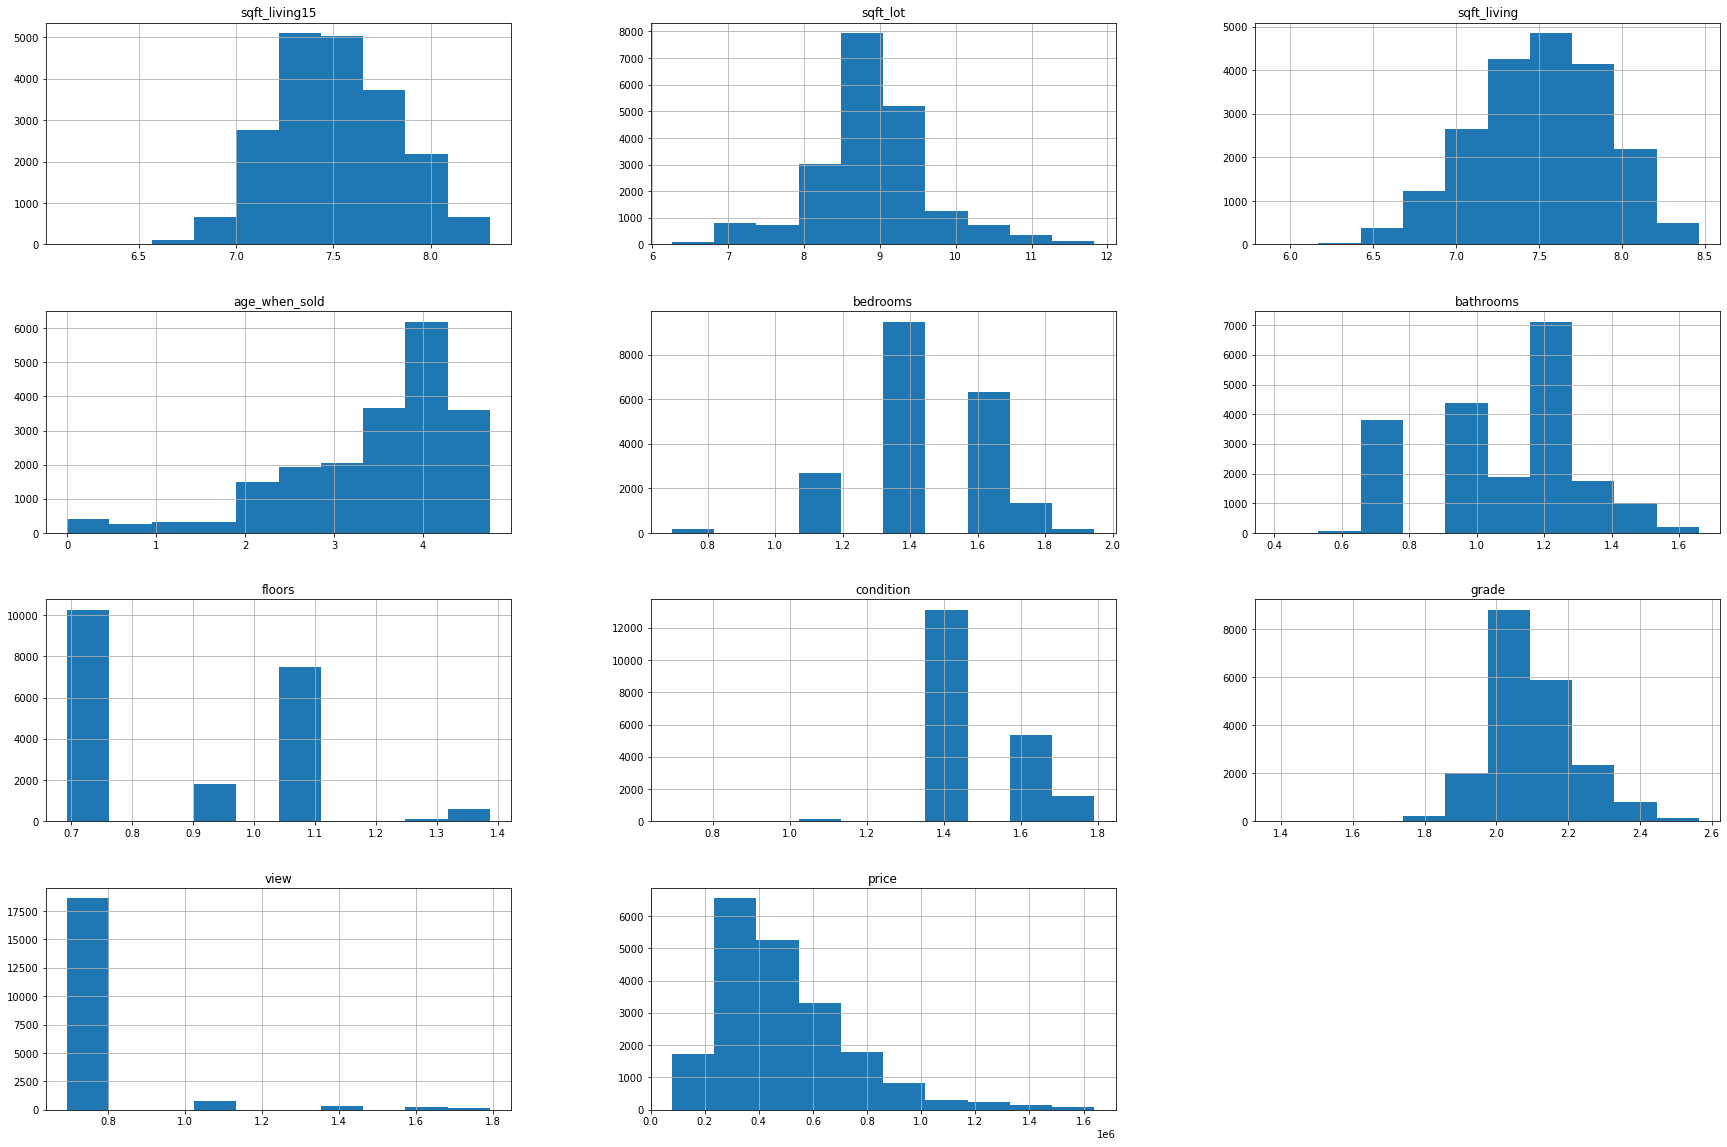

In [994]:
dfohelog[numerical+kindaboth+['price']].hist(figsize = (30,20));

In [995]:
YOLS = dfohelog['price']
XOLS = dfohelog.drop("price",axis=1)

In [996]:
sm.OLS(YOLS, sm.add_constant(XOLS)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     925.7
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:00:57   Log-Likelihood:            -2.6307e+05
No. Observations:               20239   AIC:                         5.263e+05
Df Residuals:                   20145   BIC:                         5.271e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.228e+06   2.84e+04   -113.520      0.000   -3.28e+06   -3.17e+06
bedrooms        -3.62e+04   5082.228     -7.122      0.000   -4.62e+04   -2.62e+04
bathrooms       1.532e+04   5562.790      2.755      0.006    4419.699    2.62e+04
sqft_living     2.048e+05   4491.812     45.587      0.000    1.96e+05    2.14e+05
sqft_lot        3.975e+04   1603.326     24.793      0.000    3.66e+04    4.29e+04
floors           555.9845   5851.802      0.095      0.924   -1.09e+04     1.2e+04
view            1.623e+05   4590.944     35.345      0.000    1.53e+05    1.71e+05
condition       1.263e+05   6046.156     20.891      0.000    1.14e+05    1.38e+05
grade           4.284e+05   1.06e+04     40.399      0.000    4.08e+05    4.49e+05
sqft_living15   6.202e+04   4173.929     14.858      0.000    5.38e+04    7.02e+04
age_when_sold  -7309.7051   1226.688     -5.959      0.000   -9714.113   -4905.297
waterfront_1    2.759e+05   1.36e+04     20.234      0.000    2.49e+05    3.03e+05
month_sold_2    7213.8398   4739.710      1.522      0.128   -2076.378    1.65e+04
month_sold_3     2.35e+04   4384.909      5.360      0.000    1.49e+04    3.21e+04
month_sold_4    3.064e+04   4264.693      7.186      0.000    2.23e+04     3.9e+04
month_sold_5    2809.8337   4231.165      0.664      0.507   -5483.595    1.11e+04
month_sold_6    -663.4593   4286.276     -0.155      0.877   -9064.910    7737.991
month_sold_7   -3751.7692   4281.383     -0.876      0.381   -1.21e+04    4640.092
month_sold_8   -8056.2602   4368.760     -1.844      0.065   -1.66e+04     506.867
month_sold_9   -1.135e+04   4428.345     -2.564      0.010      -2e+04   -2674.258
month_sold_10  -4681.4111   4391.638     -1.066      0.286   -1.33e+04    3926.558
month_sold_11  -5500.7504   4627.492     -1.189      0.235   -1.46e+04    3569.513
month_sold_12  -4120.4130   4593.692     -0.897      0.370   -1.31e+04    4883.600
has_basement_1 -2.718e+04   2049.942    -13.260      0.000   -3.12e+04   -2.32e+04
recent_reno_1   5.563e+04   4445.865     12.513      0.000    4.69e+04    6.43e+04
zipcode_98002   3.832e+04   9577.841      4.001      0.000    1.95e+04    5.71e+04
zipcode_98003   1623.3516   8630.093      0.188      0.851   -1.53e+04    1.85e+04
zipcode_98004   6.294e+05   9286.599     67.778      0.000    6.11e+05    6.48e+05
zipcode_98005   3.464e+05   1.06e+04     32.593      0.000    3.26e+05    3.67e+05
zipcode_98006   2.953e+05   7888.583     37.429      0.000     2.8e+05    3.11e+05
zipcode_98007   2.697e+05   1.09e+04     24.756      0.000    2.48e+05    2.91e+05
zipcode_98008   2.617e+05   8709.905     30.047      0.000    2.45e+05    2.79e+05
zipcode_98010    8.38e+04   1.32e+04      6.336      0.000    5.79e+04     1.1e+05
zipcode_98011   1.511e+05   9646.259     15.663      0.000    1.32e+05     1.7e+05
zipcode_9801

In [997]:
fourth_model = LinearRegression()

fourth_model_scores = cross_validate(
    estimator=fourth_model,
    X=dfohelog.drop("price",axis=1),
    # y=df2logprice,
    y=dfohelog['price'],
    return_train_score=True,
    cv=splitter
)
print("Current Model (log transform sq ft numerical features and price)")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()

print("Third Model (OHE of categorical features only)")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()

# print("Second Second Model (log transform price)")
# print("Train score:     ", second2_model_scores["train_score"].mean())
# print("Validation score:", second2_model_scores["test_score"].mean())
# print()

print("Second Model (using all features)")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()

print("Baseline Model (just using most correlated feature")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model (log transform sq ft numerical features and price)
Train score:      0.811315760530098
Validation score: 0.8062243560864815

Third Model (OHE of categorical features only)
Train score:      0.8305401712031882
Validation score: 0.8264880140001442

Second Model (using all features)
Train score:      0.6061460881617369
Validation score: 0.6068163123426036

Baseline Model (just using most correlated feature
Train score:      0.4047528946449441
Validation score: 0.4144106635099371


Interpret these results. Did our second model perform better than the baseline? Any ideas about why or why not?

**Hint:** because the purpose of this model is to set future prices that have not been determined yet, the most important metric for evaluating model performance is the validation score, not the train score.

In [419]:
# Replace None with appropriate text
"""
I think it got worse.
"""

'\nI think it got worse.\n'

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>Our second model got slightly better scores on the training data, but worse scores on the validation data. This means that it is a worse model overall, since what we care about is the ability to generate prices for future LEGO sets, not the ability to fit well to the known LEGO sets' features</p>
    <p>It seems like adding in these other features is actually just causing overfitting, rather than improving the model's ability to understand the underlying patterns in the data</p>
</details>

## 3. Select the Best Combination of Features

As you likely noted above, adding all relevant numeric features did not actually improve the model performance. Instead, it led to overfitting.



### Selecting Features Based on p-values

Given that we suspect our model's issues are related to multicollinearity, let's try to narrow down those features. In this case, let's use the p-values assigned to the coefficients of the model.

Looking at the model summary above, ***which features are statistically significant, with p-values below 0.05***? (P-values are labeled **P>|t|** in a StatsModels summary.)

In [420]:
# Replace None with appropriate text
"""
piece count and min age
"""

'\npiece count and min age\n'

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p><code>const</code> (the intercept), <code>piece_count</code>, and <code>min_age</code></p>
</details>

**Important note:** There are many limitations to using coefficient p-values to select features. See [this StackExchange answer](https://stats.stackexchange.com/a/291239) with examples in R for more details. The suggested alternative in that answer, `glmnet`, is a form of *regularization*, which you will learn about later. Another related technique is *dimensionality reduction*, which will also be covered later. However for now you can proceed using just the p-values technique until the more-advanced techniques have been covered.

In the cell below, create a list `significant_features` that contains the names of the columns whose features have statistically significant coefficient p-values. You should not include `"const"` in that list because `LinearRegression` from scikit-learn automatically adds a constant term and there is no column of `X_train` called `"const"`.

(You do not need to extract this information programmatically, just write them out like `"column_name_1", "column_name_2"` etc.)

Now let's build a model using those significant features only:

Interpret the results below. What happened when we removed the features with high p-values?

In [421]:
# Replace None with appropriate text
"""
Still looks basically the same performance to me
"""

'\nStill looks basically the same performance to me\n'

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>Removing those features led to the best model so far, although the scores are very similar to the baseline</p>
</details>

### Selecting Features with `sklearn.feature_selection`

Let's try a different approach. Scikit-learn has a submodule called `feature_selection` that includes tools to help reduce the feature set.

We'll use `RFECV` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV)). "RFE" stands for "recursive feature elimination", meaning that it repeatedly scores the model, finds and removes the feature with the lowest "importance", then scores the model again. If the new score is better than the previous score, it continues removing features until the minimum is reached. "CV" stands for "cross validation" here, and we can use the same splitter we have been using to test our data so far.

In [232]:
# toscale = [numerical]

In [998]:
toscale = [numerical+kindaboth]

In [196]:
# toscale = [numerical,'price']

In [254]:
# toscale = ['age_when_sold']

In [999]:
toscale

[['sqft_living15',
  'sqft_lot',
  'sqft_living',
  'age_when_sold',
  'bedrooms',
  'bathrooms',
  'floors',
  'condition',
  'grade',
  'view']]

In [1000]:
dfoheminmax = dfohelog.copy()

for feature in toscale:
    d_min = dfoheminmax[feature].min()
    d_max = dfoheminmax[feature].max()
    dfoheminmax[feature] = (dfoheminmax[feature] - d_min) / (d_max - d_min)

In [1001]:
dfoheminmax.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,20239.0,493426.157468,245377.143139,78000.0,315000.000000,439950.000000,613000.000000,1640000.0
bedrooms,20239.0,0.599022,0.163107,0.0,0.553295,0.553295,0.731416,1.0
bathrooms,20239.0,0.544078,0.190436,0.0,0.407759,0.553295,0.676343,1.0
sqft_living,20239.0,0.625274,0.153699,0.0,0.521093,0.632441,0.737225,1.0
sqft_lot,20239.0,0.472861,0.136906,0.0,0.405781,0.476400,0.530691,1.0
...,...,...,...,...,...,...,...,...
zipcode_98177,20239.0,0.011661,0.107356,0.0,0.000000,0.000000,0.000000,1.0
zipcode_98178,20239.0,0.012797,0.112401,0.0,0.000000,0.000000,0.000000,1.0
zipcode_98188,20239.0,0.006621,0.081101,0.0,0.000000,0.000000,0.000000,1.0
zipcode_98198,20239.0,0.013736,0.116395,0.0,0.000000,0.000000,0.000000,1.0


In [1002]:
YOLS = dfoheminmax['price']
XOLS = dfoheminmax.drop("price",axis=1)

In [1003]:
sm.OLS(YOLS, sm.add_constant(XOLS)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     925.7
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:01:27   Log-Likelihood:            -2.6307e+05
No. Observations:               20239   AIC:                         5.263e+05
Df Residuals:                   20145   BIC:                         5.271e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.121e+05   1.11e+04    -55.083      0.000   -6.34e+05    -5.9e+05
bedrooms       -4.534e+04   6366.827     -7.122      0.000   -5.78e+04   -3.29e+04
bathrooms        1.92e+04   6968.857      2.755      0.006    5536.835    3.29e+04
sqft_living     5.221e+05   1.15e+04     45.587      0.000       5e+05    5.45e+05
sqft_lot        2.216e+05   8936.225     24.793      0.000    2.04e+05    2.39e+05
floors           385.3791   4056.160      0.095      0.924   -7565.026    8335.784
view            1.783e+05   5043.668     35.345      0.000    1.68e+05    1.88e+05
condition       1.388e+05   6642.382     20.891      0.000    1.26e+05    1.52e+05
grade            5.05e+05   1.25e+04     40.399      0.000     4.8e+05    5.29e+05
sqft_living15   1.347e+05   9063.037     14.858      0.000    1.17e+05    1.52e+05
age_when_sold  -3.475e+04   5831.170     -5.959      0.000   -4.62e+04   -2.33e+04
waterfront_1    2.759e+05   1.36e+04     20.234      0.000    2.49e+05    3.03e+05
month_sold_2    7213.8398   4739.710      1.522      0.128   -2076.378    1.65e+04
month_sold_3     2.35e+04   4384.909      5.360      0.000    1.49e+04    3.21e+04
month_sold_4    3.064e+04   4264.693      7.186      0.000    2.23e+04     3.9e+04
month_sold_5    2809.8337   4231.165      0.664      0.507   -5483.595    1.11e+04
month_sold_6    -663.4593   4286.276     -0.155      0.877   -9064.910    7737.991
month_sold_7   -3751.7692   4281.383     -0.876      0.381   -1.21e+04    4640.092
month_sold_8   -8056.2602   4368.760     -1.844      0.065   -1.66e+04     506.867
month_sold_9   -1.135e+04   4428.345     -2.564      0.010      -2e+04   -2674.258
month_sold_10  -4681.4111   4391.638     -1.066      0.286   -1.33e+04    3926.558
month_sold_11  -5500.7504   4627.492     -1.189      0.235   -1.46e+04    3569.513
month_sold_12  -4120.4130   4593.692     -0.897      0.370   -1.31e+04    4883.600
has_basement_1 -2.718e+04   2049.942    -13.260      0.000   -3.12e+04   -2.32e+04
recent_reno_1   5.563e+04   4445.865     12.513      0.000    4.69e+04    6.43e+04
zipcode_98002   3.832e+04   9577.841      4.001      0.000    1.95e+04    5.71e+04
zipcode_98003   1623.3516   8630.093      0.188      0.851   -1.53e+04    1.85e+04
zipcode_98004   6.294e+05   9286.599     67.778      0.000    6.11e+05    6.48e+05
zipcode_98005   3.464e+05   1.06e+04     32.593      0.000    3.26e+05    3.67e+05
zipcode_98006   2.953e+05   7888.583     37.429      0.000     2.8e+05    3.11e+05
zipcode_98007   2.697e+05   1.09e+04     24.756      0.000    2.48e+05    2.91e+05
zipcode_98008   2.617e+05   8709.905     30.047      0.000    2.45e+05    2.79e+05
zipcode_98010    8.38e+04   1.32e+04      6.336      0.000    5.79e+04     1.1e+05
zipcode_98011   1.511e+05   9646.259     15.663      0.000    1.32e+05     1.7e+05
zipcode_9801

In [1004]:
Yscaled = dfoheminmax['price']
Xscaled = dfoheminmax.drop("price",axis=1)

In [1005]:
from sklearn.feature_selection import RFECV

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(Xscaled,Yscaled)

# Print the results
print("Was the column selected?")
for index, col in enumerate(Xscaled.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: False
view: True
condition: True
grade: True
sqft_living15: True
age_when_sold: True
waterfront_1: True
month_sold_2: True
month_sold_3: True
month_sold_4: True
month_sold_5: False
month_sold_6: False
month_sold_7: True
month_sold_8: True
month_sold_9: True
month_sold_10: True
month_sold_11: True
month_sold_12: True
has_basement_1: True
recent_reno_1: True
zipcode_98002: True
zipcode_98003: False
zipcode_98004: True
zipcode_98005: True
zipcode_98006: True
zipcode_98007: True
zipcode_98008: True
zipcode_98010: True
zipcode_98011: True
zipcode_98014: True
zipcode_98019: True
zipcode_98022: False
zipcode_98023: True
zipcode_98024: True
zipcode_98027: True
zipcode_98028: True
zipcode_98029: True
zipcode_98030: True
zipcode_98031: True
zipcode_98032: True
zipcode_98033: True
zipcode_98034: True
zipcode_98038: True
zipcode_98039: True
zipcode_98040: True
zipcode_98042: True
zipcode_98045: True
zi

In [739]:
Xscaled.columns[selector.support_]

Index(['sqft_living', 'sqft_lot', 'sqft_living15', 'waterfront_1', 'view_5.0',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98011', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98155', 'zipcode_98177',
       'zipcode_98199'],
      dtype='object')

In [740]:
Xscaled.columns[selector.support_]

Index(['sqft_living', 'sqft_lot', 'sqft_living15', 'waterfront_1', 'view_5.0',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98011', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98155', 'zipcode_98177',
       'zipcode_98199'],
      dtype='object')

In [741]:
RFECV_features = Xscaled.columns[selector.support_]

In [742]:
RFECV_features

Index(['sqft_living', 'sqft_lot', 'sqft_living15', 'waterfront_1', 'view_5.0',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98011', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98155', 'zipcode_98177',
       'zipcode_98199'],
      dtype='object')

In [743]:
sm.OLS(Yscaled, sm.add_constant(Xscaled[RFECV_features])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1740.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:17:00   Log-Likelihood:                 3328.6
No. Observations:               20239   AIC:                            -6555.
Df Residuals:                   20188   BIC:                            -6152.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.2853      0.010   1184.253      0.000      11.267      11.304
sqft_living       1.3503      0.014     98.582      0.000       1.323       1.377
sqft_lot          0.2401      0.014     17.710      0.000       0.213       0.267
sqft_living15     0.6066      0.016     37.568      0.000       0.575       0.638
waterfront_1      0.4590      0.029     15.793      0.000       0.402       0.516
view_5.0          0.2794      0.018     15.231      0.000       0.243       0.315
zipcode_98004     0.9735      0.014     68.823      0.000       0.946       1.001
zipcode_98005     0.6421      0.017     37.170      0.000       0.608       0.676
zipcode_98006     0.5617      0.011     53.183      0.000       0.541       0.582
zipcode_98007     0.5503      0.018     30.781      0.000       0.515       0.585
zipcode_98008     0.5360      0.013     42.153      0.000       0.511       0.561
zipcode_98011     0.3030      0.015     20.050      0.000       0.273       0.333
zipcode_98024     0.2759      0.030      9.239      0.000       0.217       0.334
zipcode_98027     0.4203      0.011     37.517      0.000       0.398       0.442
zipcode_98028     0.2728      0.013     21.661      0.000       0.248       0.297
zipcode_98029     0.5248      0.012     43.508      0.000       0.501       0.548
zipcode_98033     0.6834      0.011     64.589      0.000       0.663       0.704
zipcode_98034     0.4058      0.009     43.558      0.000       0.388       0.424
zipcode_98039     1.1519      0.050     23.059      0.000       1.054       1.250
zipcode_98040     0.8216      0.014     57.560      0.000       0.794       0.850
zipcode_98045     0.2150      0.015     14.215      0.000       0.185       0.245
zipcode_98052     0.5285      0.009     57.945      0.000       0.511       0.546
zipcode_98053     0.4881      0.012     42.419      0.000       0.466       0.511
zipcode_98065     0.2673      0.013     21.190      0.000       0.243       0.292
zipcode_98070     0.2393      0.024      9.804      0.000       0.191       0.287
zipcode_98072     0.3574      0.013     27.121      0.000       0.332       0.383
zipcode_98074     0.4655      0.011     44.113      0.000       0.445       0.486
zipcode_98075     0.4807      0.012     40.004      0.000       0.457       0.504
zipcode_98077     0.3564      0.017     21.481      0.000       0.324       0.389
zipcode_98102     0.9325      0.021     43.673      0.000       0.891       0.974
zipcode_98103     0.7739      0.009     84.121      0.000       0.756       0.792
zipcode_98105     0.8701      0.015     59.349      0.000       0.841       0.899
zipcode_98106     0.2609      0.012     22.251      0.000       0.238       0.284
zipcode_98107     0.7983      0.013     60.207      0.000       0.772       0.824
zipcode_98108     0.2482      0.015     16.116   

In [744]:
fifth_model = LinearRegression()

fifth_model_scores = cross_validate(
    estimator=fifth_model,
    X=Xscaled[RFECV_features],
    y=Yscaled,
    return_train_score=True,
    cv=splitter
)

print("Current Mdoel (Recursive Feature Elimination after Min Max Scaling)")
print("Train score:     ", fifth_model_scores["train_score"].mean())
print("Validation score:", fifth_model_scores["test_score"].mean())
print()

print("Fourth Model (log transform sq ft numerical features and price)")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()

print("Third Model (OHE of categorical features only)")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()

# print("Second Second Model (log transform price)")
# print("Train score:     ", second2_model_scores["train_score"].mean())
# print("Validation score:", second2_model_scores["test_score"].mean())
# print()

print("Second Model (using all features)")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()

print("Baseline Model (just using most correlated feature")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Mdoel (Recursive Feature Elimination after Min Max Scaling)
Train score:      0.8120349988412032
Validation score: 0.8099964070875507

Fourth Model (log transform sq ft numerical features and price)
Train score:      0.8674584338402016
Validation score: 0.8634139298203151

Third Model (OHE of categorical features only)
Train score:      0.8394165919547611
Validation score: 0.8338782169267578

Second Model (using all features)
Train score:      0.6061460881617369
Validation score: 0.6068163123426036

Baseline Model (just using most correlated feature
Train score:      0.4047528946449441
Validation score: 0.4144106635099371


Interesting. So, this algorithm is saying that our baseline model, with `piece_count` as the only feature, is the best one it could find.

However, note that this is based on the "importances" of the features, which means the coefficients in the context of a linear regression. It is possible that we can still get a better model by including multiple features, if we try removing columns using a different strategy.

### A Brute Force Approach

Given that we have only four columns and only a few hundred rows, one other option we have is something more computationally expensive: write custom code that goes over multiple different permutations of the columns, to see if we can find something better than the p-values approach or the `RFECV` approach.

The code below assumes that we want to keep the `piece_count` column, then attempts a linear regression with all possible combinations of 1-2 additional features. Don't worry too much if you don't understand everything that is happening here — an approach like this should be a last resort and you may not ever need to use it!

Interpret the table above. It shows both training and validation scores for `piece_count` as well as all combinations of 0, 1, 2, or 3 other features.

Which features make the best model? Which make the worst? How does this align with the previous discussion of multicollinearity? And how much does feature selection seem to matter in general for this dataset + model algorithm, once we have identified the most correlated feature for the baseline?

In [ ]:
# Replace None with appropriate text
"""
in my opinion, the differences seem negiligible as long as piece count is the main feature for the model. row 6 has best val score. 
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>The best model uses <code>piece_count</code>, <code>max_age</code>, and <code>difficulty_level</code>. It has a validation score of 0.781578</p>
    <p>The worst model uses <code>piece_count</code>, <code>min_age</code>, and <code>max_age</code>. It has a validation score of 0.751768</p>
    <p>This makes sense if we think that <code>min_age</code> and <code>max_age</code> are mostly providing the same information, and that the difference is mainly noise (leading to overfitting), that the best model would only have one of them</p>
    <p>Overall, feature selection does not seem to matter very much for this dataset + linear regression. So long as we use our most correlated feature (<code>piece_count</code>), the validation score doesn't change very much, regardless of which other features are included.</p>
</details>

## 4. Build and Evaluate a Final Predictive Model

In the cell below, create a list `best_features` which contains the names of the best model features based on the findings of the previous step:

In [ ]:
# Replace None with appropriate code
# best_features = ["piece_count", "max_age", "difficulty_level"]

Now, we prepare the data for modeling:

In [218]:
# # Run this cell without changes
# X_train_final = X_train[best_features]
# X_test_final = X_test[best_features]

NameError: name 'best_features' is not defined

In the cell below, instantiate a `LinearRegression` model called `final_model`, then fit it on the training data and score it on the test data.

In [ ]:
# # Replace None with appropriate code

# final_model = LinearRegression()

# # Fit the model on X_train_final and y_train
# final_model.fit(X_train_final, y_train)

# # Score the model on X_test_final and y_test
# # (use the built-in .score method)
# final_model.score( X_test_final, y_test)

NameError: name 'X_train_final' is not defined

In [745]:
X_train, X_val, y_train, y_val = train_test_split(Xscaled[RFECV_features], Yscaled, shuffle=True, test_size=0.25, random_state=10)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_train_preds = linreg.predict(X_train)
y_val_preds = linreg.predict(X_val)
y_pred = linreg.predict(Xscaled[RFECV_features])

Text(0, 0.5, 'Actual (log(1+$))')

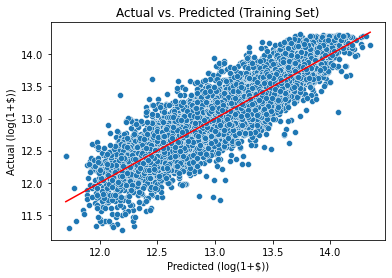

In [746]:
sns.scatterplot(x=y_train_preds, y=y_train)

sns.lineplot(x=y_train_preds, y=y_train_preds, color='red')

plt.title('Actual vs. Predicted (Training Set)')
plt.xlabel('Predicted (log(1+$))')
plt.ylabel('Actual (log(1+$))')

Text(0, 0.5, 'Actual (log(1+$))')

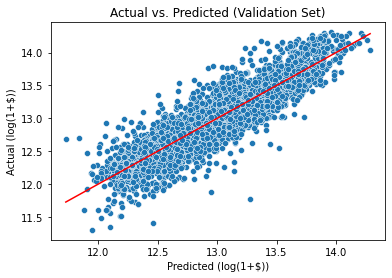

In [747]:
y_val_preds = linreg.predict(X_val)


sns.scatterplot(x=y_val_preds, y=y_val)
sns.lineplot(x=y_val_preds, y=y_val_preds, color='red')
plt.title('Actual vs. Predicted (Validation Set)')
plt.xlabel('Predicted (log(1+$))')
plt.ylabel('Actual (log(1+$))')

In [748]:
X_int = sm.add_constant(Xscaled[RFECV_features])
model = sm.OLS(Yscaled.astype(float), X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1740.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:17:29   Log-Likelihood:                 3328.6
No. Observations:               20239   AIC:                            -6555.
Df Residuals:                   20188   BIC:                            -6152.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.2853      0.010   1184.253      0.000      11.267      11.304
sqft_living       1.3503      0.014     98.582      0.000       1.323       1.377
sqft_lot          0.2401      0.014     17.710      0.000       0.213       0.267
sqft_living15     0.6066      0.016     37.568      0.000       0.575       0.638
waterfront_1      0.4590      0.029     15.793      0.000       0.402       0.516
view_5.0          0.2794      0.018     15.231      0.000       0.243       0.315
zipcode_98004     0.9735      0.014     68.823      0.000       0.946       1.001
zipcode_98005     0.6421      0.017     37.170      0.000       0.608       0.676
zipcode_98006     0.5617      0.011     53.183      0.000       0.541       0.582
zipcode_98007     0.5503      0.018     30.781      0.000       0.515       0.585
zipcode_98008     0.5360      0.013     42.153      0.000       0.511       0.561
zipcode_98011     0.3030      0.015     20.050      0.000       0.273       0.333
zipcode_98024     0.2759      0.030      9.239      0.000       0.217       0.334
zipcode_98027     0.4203      0.011     37.517      0.000       0.398       0.442
zipcode_98028     0.2728      0.013     21.661      0.000       0.248       0.297
zipcode_98029     0.5248      0.012     43.508      0.000       0.501       0.548
zipcode_98033     0.6834      0.011     64.589      0.000       0.663       0.704
zipcode_98034     0.4058      0.009     43.558      0.000       0.388       0.424
zipcode_98039     1.1519      0.050     23.059      0.000       1.054       1.250
zipcode_98040     0.8216      0.014     57.560      0.000       0.794       0.850
zipcode_98045     0.2150      0.015     14.215      0.000       0.185       0.245
zipcode_98052     0.5285      0.009     57.945      0.000       0.511       0.546
zipcode_98053     0.4881      0.012     42.419      0.000       0.466       0.511
zipcode_98065     0.2673      0.013     21.190      0.000       0.243       0.292
zipcode_98070     0.2393      0.024      9.804      0.000       0.191       0.287
zipcode_98072     0.3574      0.013     27.121      0.000       0.332       0.383
zipcode_98074     0.4655      0.011     44.113      0.000       0.445       0.486
zipcode_98075     0.4807      0.012     40.004      0.000       0.457       0.504
zipcode_98077     0.3564      0.017     21.481      0.000       0.324       0.389
zipcode_98102     0.9325      0.021     43.673      0.000       0.891       0.974
zipcode_98103     0.7739      0.009     84.121      0.000       0.756       0.792
zipcode_98105     0.8701      0.015     59.349      0.000       0.841       0.899
zipcode_98106     0.2609      0.012     22.251      0.000       0.238       0.284
zipcode_98107     0.7983      0.013     60.207      0.000       0.772       0.824
zipcode_98108     0.2482      0.015     16.116   

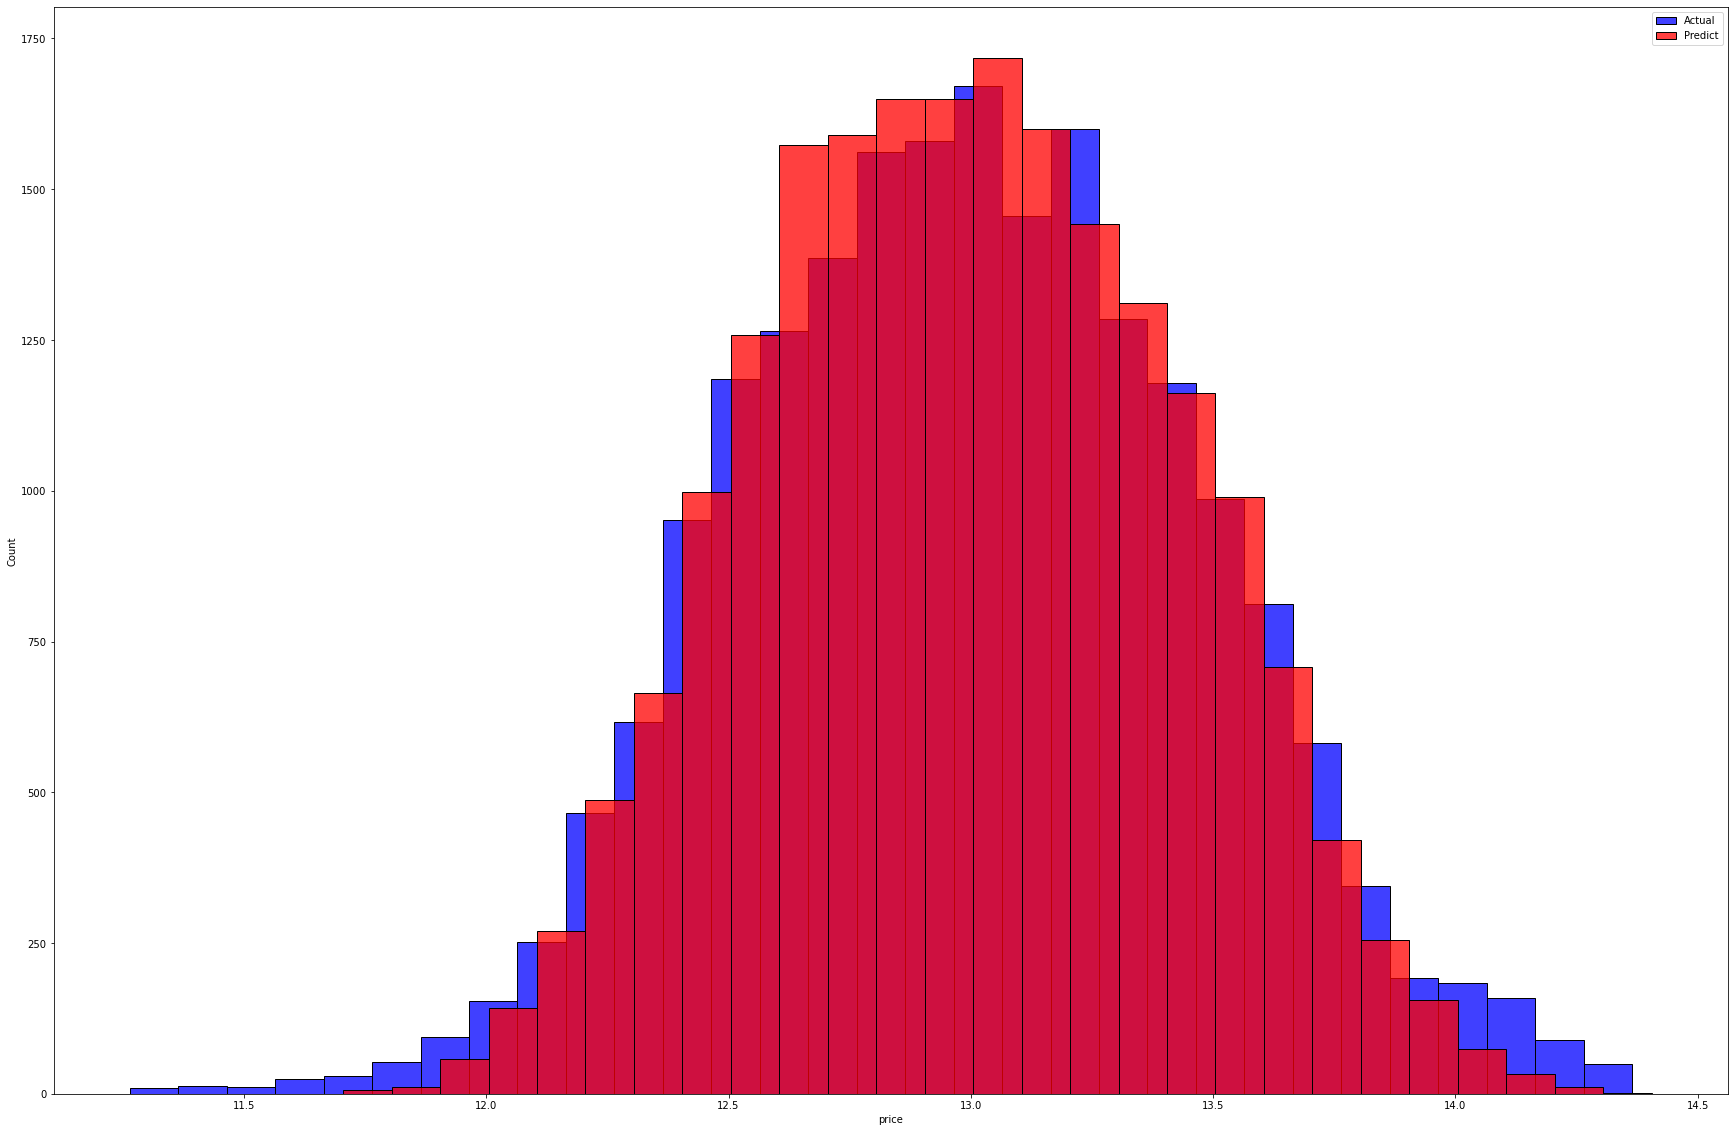

In [749]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.histplot(Yscaled, label='Actual', color='blue', binwidth=.1)
sns.histplot(y_pred, label='Predict', color='red', binwidth=.1)
plt.legend()

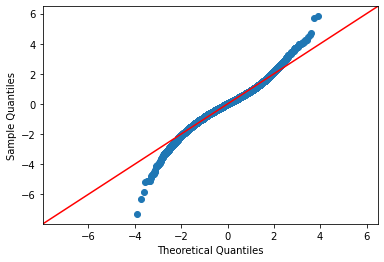

In [750]:
sm.graphics.qqplot(model.resid, line='45', fit=True);

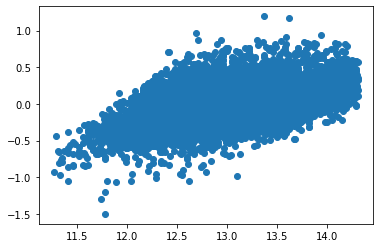

In [751]:
plt.scatter(Yscaled, model.resid)

In [752]:
model.params.sort_values(ascending=False).round(3)

const            11.285
sqft_living       1.350
zipcode_98039     1.152
zipcode_98004     0.973
zipcode_98112     0.954
zipcode_98109     0.944
zipcode_98119     0.937
zipcode_98102     0.932
zipcode_98105     0.870
zipcode_98040     0.822
zipcode_98199     0.801
zipcode_98107     0.798
zipcode_98103     0.774
zipcode_98122     0.761
zipcode_98117     0.747
zipcode_98115     0.726
zipcode_98116     0.707
zipcode_98033     0.683
zipcode_98005     0.642
zipcode_98136     0.625
sqft_living15     0.607
zipcode_98144     0.595
zipcode_98006     0.562
zipcode_98007     0.550
zipcode_98008     0.536
zipcode_98052     0.528
zipcode_98029     0.525
zipcode_98126     0.504
zipcode_98053     0.488
zipcode_98177     0.486
zipcode_98075     0.481
zipcode_98074     0.466
waterfront_1      0.459
zipcode_98125     0.456
zipcode_98027     0.420
zipcode_98034     0.406
zipcode_98133     0.363
zipcode_98072     0.357
zipcode_98118     0.357
zipcode_98077     0.356
zipcode_98155     0.311
zipcode_98011   

### User-Friendly Metrics

The score above is an r-squared score. Let's compute the RMSE as well, since this would be more applicable to a business audience.

In [ ]:
# Run this cell without changes
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

What does this value mean in the current business context?

In [ ]:
# Replace None with appropriate text
"""
The RMSE is around 47.4.
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>This means that for an average LEGO set, this algorithm will be off by about $47. Given that most LEGO sets sell for less than $100, we would definitely want to have a human double-check and adjust these prices rather than just allowing the algorithm to set them</p>
</details>

## 5. Interpret the Final Model

Below, we display the coefficients and intercept for the final model:

In [ ]:
# Run this cell without changes
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

Interpret these values below. What is the pricing algorithm you have developed?

In [ ]:
# Replace None with appropriate text
"""
The intercept is 9.6. That's the starting point of pricing, as if a lego set had 0 pieces! 
Price goes up with piece count and difficulty level, but down with max age.
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>According to our model, the base price for a LEGO set (the model intercept) is about $9.68. Then for each additional LEGO piece in the set, the price goes up by $0.09 per piece. For every year higher that the maximum age is, the price goes down by about $0.04. Then finally for every increase of 1 in the difficulty level, the price goes up by about $2.04.</p>
</details>

Before assuming that these coefficients give us inferential insight into past pricing decisions, we should investigate each of the assumptions of linear regression, in order to understand how much our model violates them.

### Investigating Linearity

First, let's check whether the linearity assumption holds.

In [ ]:
# Run this cell without changes

preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

Are we violating the linearity assumption?

In [ ]:
# Replace None with appropriate text
"""
Not violating linearity assumption
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>We have some outliers that are all over the place, but in general it looks like we have a linear relationship (not violating this assumption)</p>
</details>

### Investigating Normality

Now let's check whether the normality assumption holds for our model.

In [ ]:
# Run this code without changes
import scipy.stats as stats

residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Are we violating the normality assumption?

In [ ]:
# Replace None with appropriate text
"""
Graph looks off. I would say we could be violating normality.
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>Our outliers are again causing problems. This is bad enough that we can probably say that we are violating the normality assumption</p>
</details>

### Investigating Multicollinearity (Independence Assumption)

Another way to measure multicollinearity is with [variance inflation factor](https://en.wikipedia.org/wiki/Variance_inflation_factor) ([StatsModels documentation here](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html#statsmodels.stats.outliers_influence.variance_inflation_factor)). A "rule of thumb" for VIF is that 5 is too high (i.e. strong multicollinearity).

Run the code below to find the VIF for each feature.

In [ ]:
# Run this cell without changes
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

Do we have too high of multicollinearity?

In [ ]:
# Replace None with appropriate text
"""
No.
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>We are below 5 for all features in the final model, so we don't have too high of multicollinearity</p>
</details>

### Investigating Homoscedasticity

Now let's check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

In [ ]:
# Run this cell without changes
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

Are we violating the homoscedasticity assumption?

In [ ]:
# Replace None with appropriate text
"""
looks like violating homoscedasticity. this looks more hetero
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>This is not the worst "funnel" shape, although the residuals do seem to differ some based on the predicted price. We are probably violating a strict definition of homoscedasticity.</p>
</details>

### Linear Regression Assumptions Conclusion

Given your answers above, how should we interpret our model's coefficients? Do we have a model that can be used for inferential as well as predictive purposes? What might your next steps be?

In [ ]:
# Replace None with appropriate text
"""
I think the model is good enough but not perfect. I wouldn't present it to my boss without further refinement.
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>Our confidence in these coefficients should not be too high, since we are violating or close to violating more than one of the assumptions of linear regression. This really only should be used for predictive purposes.</p>
    <p>A good next step here would be to start trying to figure out why our outliers behave the way they do. Maybe there is some information we could extract from the text features that are currently not part of the model</p>
</details>

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements.